In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
# Cell 1: Import required libraries and set up the environment

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
import os

# NLP tools
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           roc_auc_score, confusion_matrix, classification_report,
                           hamming_loss, jaccard_score)

# Deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Input, Embedding, LSTM, Dense, Dropout, Bidirectional,
                                   Conv1D, MaxPooling1D, GlobalMaxPooling1D, Concatenate)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Transformers for BERT
from transformers import AutoTokenizer, TFAutoModel
from transformers import DistilBertTokenizerFast, TFDistilBertModel

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Check for GPU availability
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Set the file paths
DATASET_PATH = "D:\\Projects\\ML Projects\\Inappropriate Comment Scanner\\Dataset\\"

TensorFlow version: 2.10.0
Num GPUs Available:  1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Training set shape: (159571, 8)
Test set shape: (153164, 2)
Sampled training set shape: (8000, 8)

Missing values in training set:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Class distribution in training set:
toxic: 749 positive samples (9.36%)
severe_toxic: 80 positive samples (1.00%)
obscene: 422 positive samples (5.27%)
threat: 13 positive samples (0.16%)
insult: 411 positive samples (5.14%)
identity_hate: 71 positive samples (0.89%)

Sample data:


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0
131631,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0
125326,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0
111256,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0
83590,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0


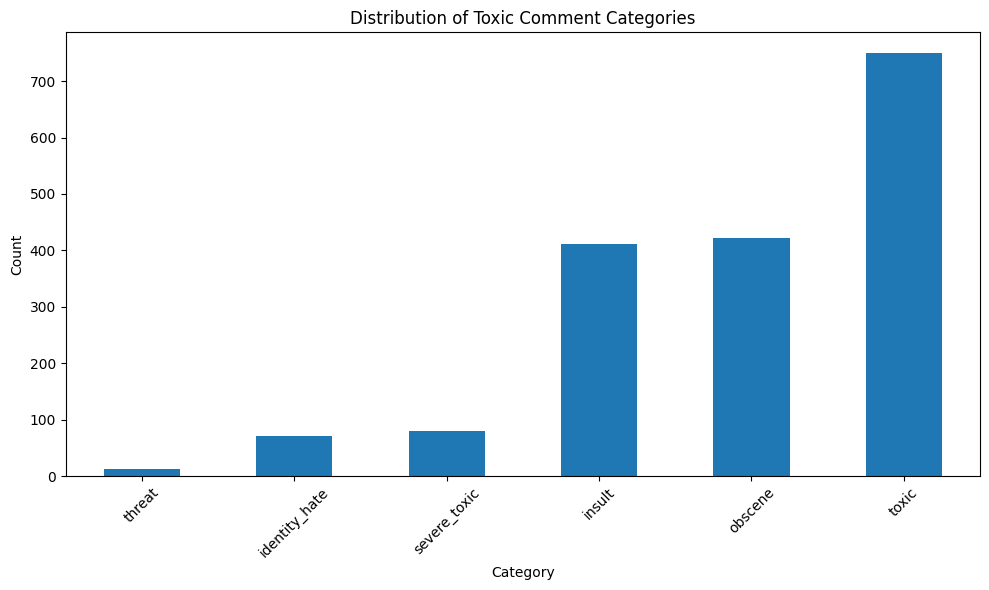

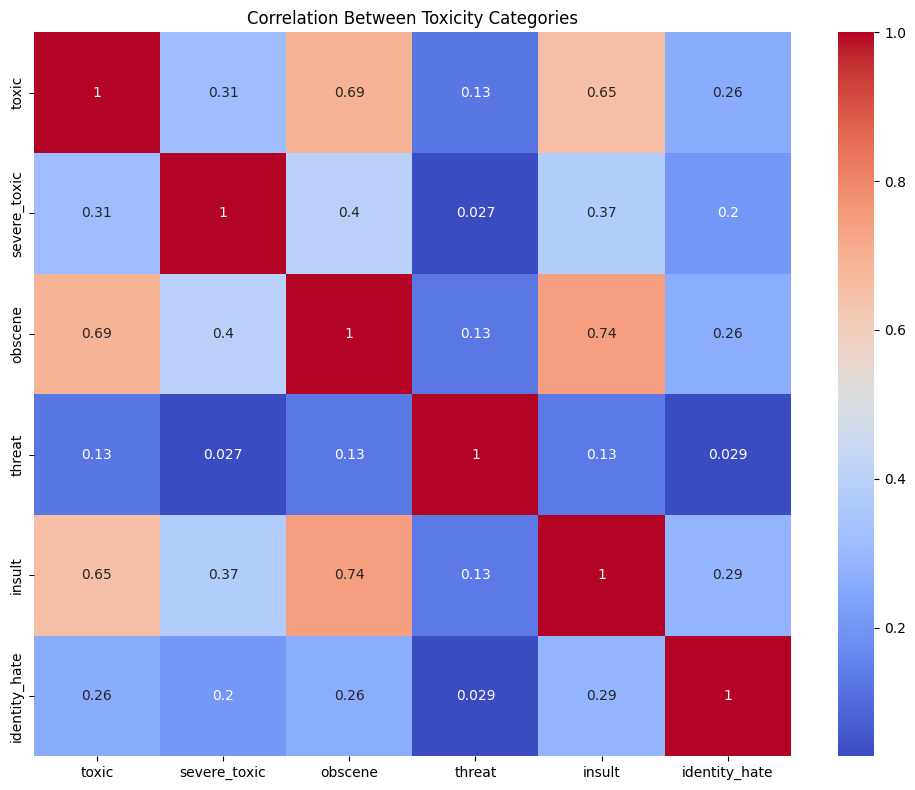

In [5]:
# Cell 2: Load and explore the dataset

# Load training and test data
train_df = pd.read_csv(os.path.join(DATASET_PATH, "train.csv"))
test_df = pd.read_csv(os.path.join(DATASET_PATH, "test.csv"))

# Display basic info about the dataset
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

# For faster processing during development, you can sample a smaller subset
# Comment out this line for the full dataset
train_df = train_df.sample(n=8000, random_state=42)
print(f"Sampled training set shape: {train_df.shape}")

# Check for missing values
print("\nMissing values in training set:")
print(train_df.isnull().sum())

# Define the label columns
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Display class distribution
print("\nClass distribution in training set:")
for col in label_cols:
    pos_count = train_df[col].sum()
    print(f"{col}: {pos_count} positive samples ({pos_count/len(train_df)*100:.2f}%)")

# View some examples
print("\nSample data:")
display(train_df[['comment_text'] + label_cols].head())

# Visualize class distribution
plt.figure(figsize=(10, 6))
train_df[label_cols].sum().sort_values().plot(kind='bar')
plt.title('Distribution of Toxic Comment Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate correlation between labels
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[label_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Toxicity Categories')
plt.tight_layout()
plt.show()

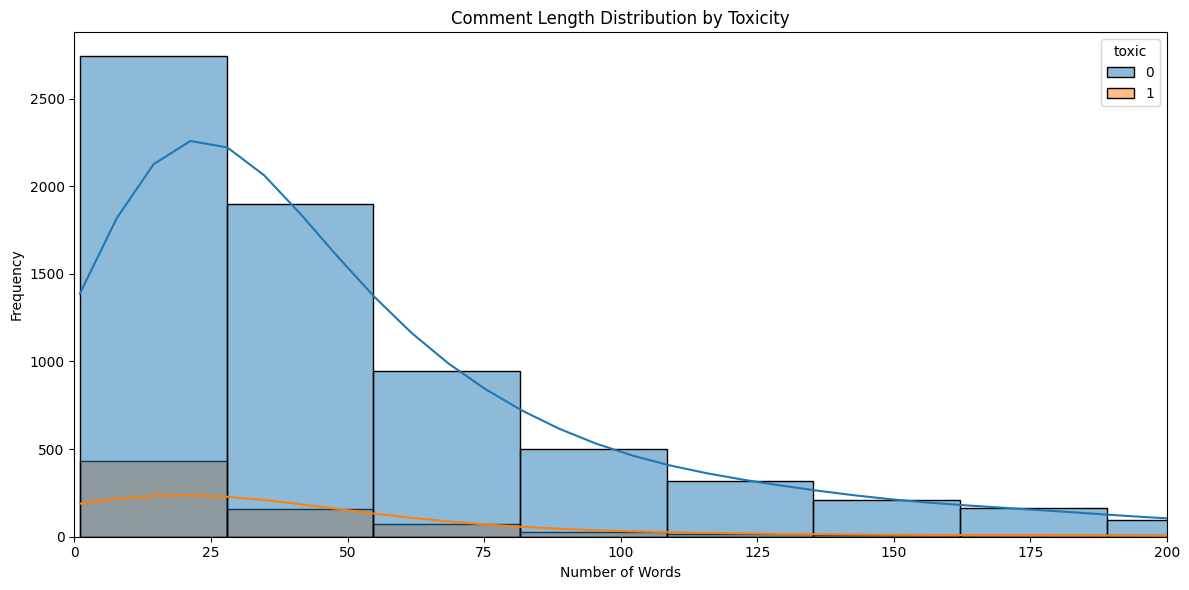

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\envs\\tf-gpu\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\envs\\tf-gpu\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\envs\\tf-gpu\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [6]:
# Cell 3: Word frequency analysis and word clouds

# Analyze comment lengths
train_df['comment_length'] = train_df['comment_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='comment_length', hue='toxic', bins=50, kde=True)
plt.title('Comment Length Distribution by Toxicity')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Limit x-axis for better visualization
plt.tight_layout()
plt.show()

# Get word frequency
all_words = []
for comment in train_df['comment_text']:
    if isinstance(comment, str):  # Check if the comment is a string
        words = word_tokenize(comment.lower())
        all_words.extend(words)

print(f"Total number of words: {len(all_words)}")
word_freq = Counter(all_words)
print("\nTop 20 most frequent words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Separate toxic and non-toxic comments
toxic_comments = train_df[train_df['toxic'] == 1]['comment_text']
non_toxic_comments = train_df[train_df['toxic'] == 0]['comment_text']

print(f"\nNumber of toxic comments: {len(toxic_comments)}")
print(f"Number of non-toxic comments: {len(non_toxic_comments)}")

# Function to create word clouds
def create_wordcloud(text_series, title):
    """Generate a word cloud from a series of texts"""
    text = " ".join(text_series.astype(str))
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=200, 
        contour_width=3, 
        contour_color='steelblue'
    )
    wordcloud.generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create word clouds
create_wordcloud(toxic_comments, 'Word Cloud for Toxic Comments')
create_wordcloud(non_toxic_comments, 'Word Cloud for Non-Toxic Comments')

In [7]:
# Cell 3a: Download NLTK resources correctly

import nltk

# Download the correct resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Verify downloads
nltk.data.find('tokenizers/punkt')
nltk.data.find('corpora/stopwords')
nltk.data.find('corpora/wordnet')

print("All NLTK resources downloaded successfully.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\envs\\tf-gpu\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\envs\\tf-gpu\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\envs\\tf-gpu\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


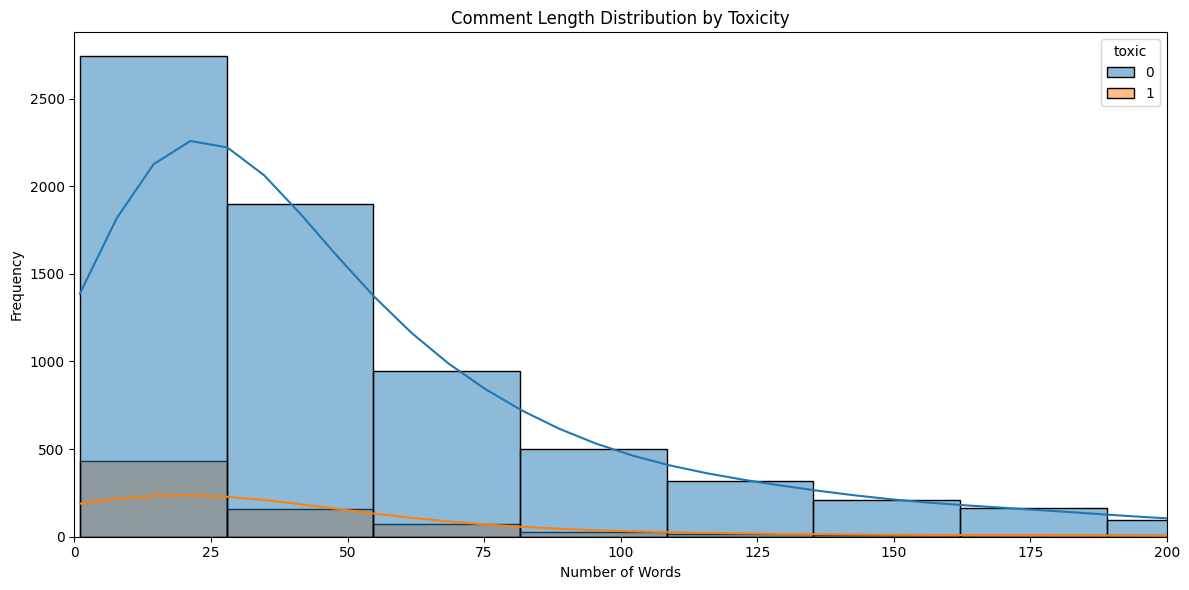

Total number of words: 520776

Top 20 most frequent words:
the: 23695
to: 14393
of: 10885
and: 10333
a: 10141
i: 9887
you: 9535
is: 8305
that: 7289
in: 6680
it: 5413
for: 5021
not: 4434
this: 4374
on: 4251
": 4239
be: 4059
as: 3713
have: 3586
are: 3380

Number of toxic comments: 749
Number of non-toxic comments: 7251


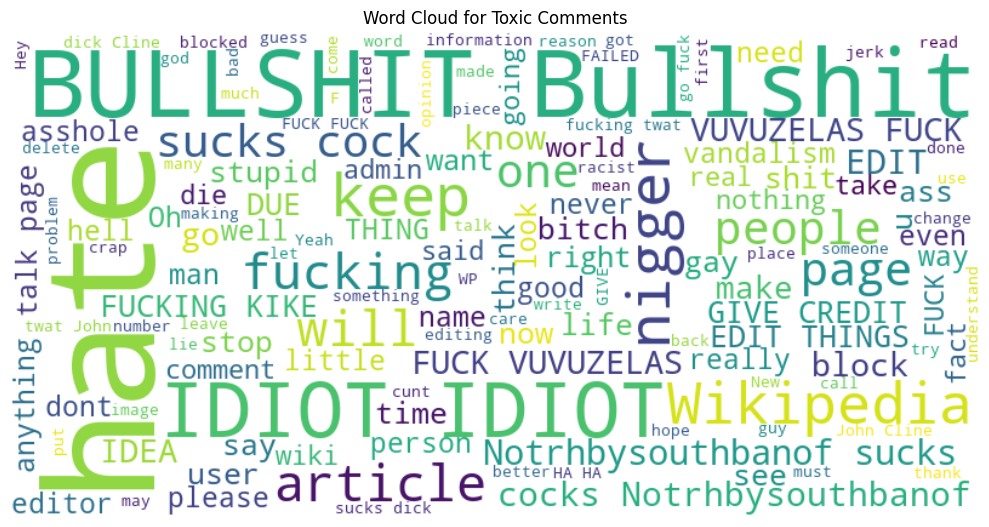

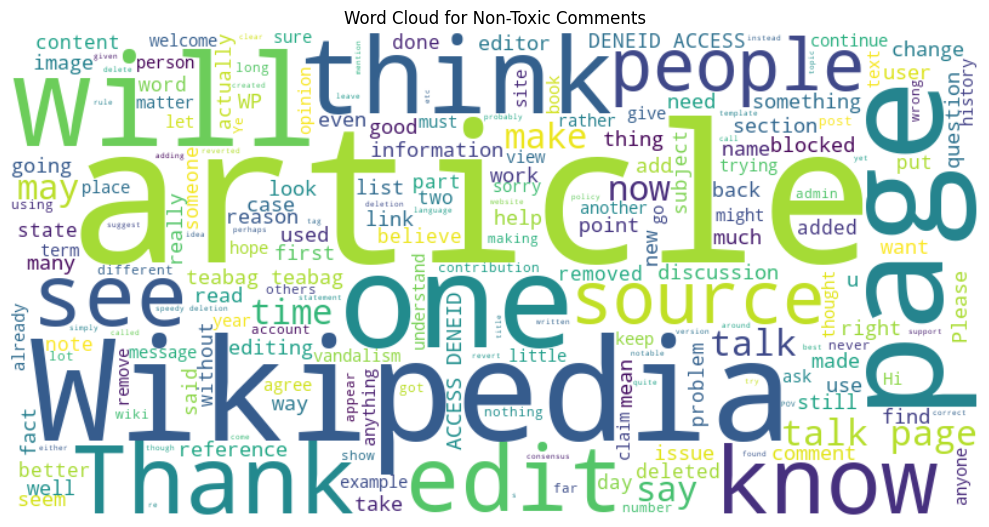

In [8]:
# Cell 3b: Word frequency analysis and word clouds (fixed)

# Analyze comment lengths
train_df['comment_length'] = train_df['comment_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='comment_length', hue='toxic', bins=50, kde=True)
plt.title('Comment Length Distribution by Toxicity')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Limit x-axis for better visualization
plt.tight_layout()
plt.show()

# Get word frequency (using a simpler approach to avoid potential NLTK issues)
all_words = []
for comment in train_df['comment_text']:
    if isinstance(comment, str):
        # Simple word tokenization by splitting on whitespace
        words = comment.lower().split()
        all_words.extend(words)

print(f"Total number of words: {len(all_words)}")
word_freq = Counter(all_words)
print("\nTop 20 most frequent words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Separate toxic and non-toxic comments
toxic_comments = train_df[train_df['toxic'] == 1]['comment_text']
non_toxic_comments = train_df[train_df['toxic'] == 0]['comment_text']

print(f"\nNumber of toxic comments: {len(toxic_comments)}")
print(f"Number of non-toxic comments: {len(non_toxic_comments)}")

# Function to create word clouds
def create_wordcloud(text_series, title):
    """Generate a word cloud from a series of texts"""
    text = " ".join(text_series.astype(str))
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=200, 
        contour_width=3, 
        contour_color='steelblue'
    )
    wordcloud.generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create word clouds
create_wordcloud(toxic_comments, 'Word Cloud for Toxic Comments')
create_wordcloud(non_toxic_comments, 'Word Cloud for Non-Toxic Comments')

In [9]:
# Cell 3a-fix: Download NLTK resources with explicit paths

import nltk
import os

# Create a directory for NLTK data if it doesn't exist
nltk_data_dir = os.path.join(os.path.expanduser('~'), 'nltk_data')
os.makedirs(nltk_data_dir, exist_ok=True)

# Download resources and specify the download directory
nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('omw-1.4', download_dir=nltk_data_dir)  # This is needed for wordnet

print("All NLTK resources downloaded successfully.")
print(f"NLTK data directory: {nltk_data_dir}")

# Set the NLTK data path
nltk.data.path.append(nltk_data_dir)

[nltk_data] Downloading package punkt to C:\Users\User\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\User\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\User\nltk_data...


All NLTK resources downloaded successfully.
NLTK data directory: C:\Users\User\nltk_data


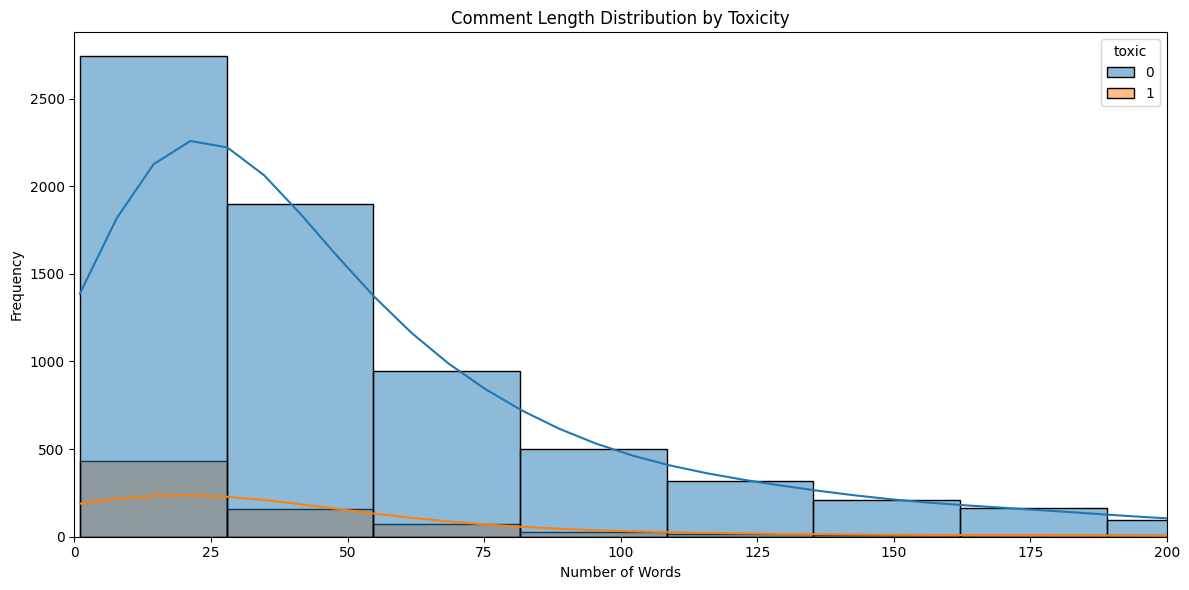

Total number of words: 512131

Top 20 most frequent words:
the: 23968
to: 14530
of: 10931
and: 10538
you: 10277
a: 10262
i: 10085
is: 8551
that: 7673
in: 6848
it: 6391
for: 5102
this: 4761
not: 4689
on: 4355
be: 4129
as: 3791
have: 3621
are: 3466
your: 2920

Number of toxic comments: 749
Number of non-toxic comments: 7251


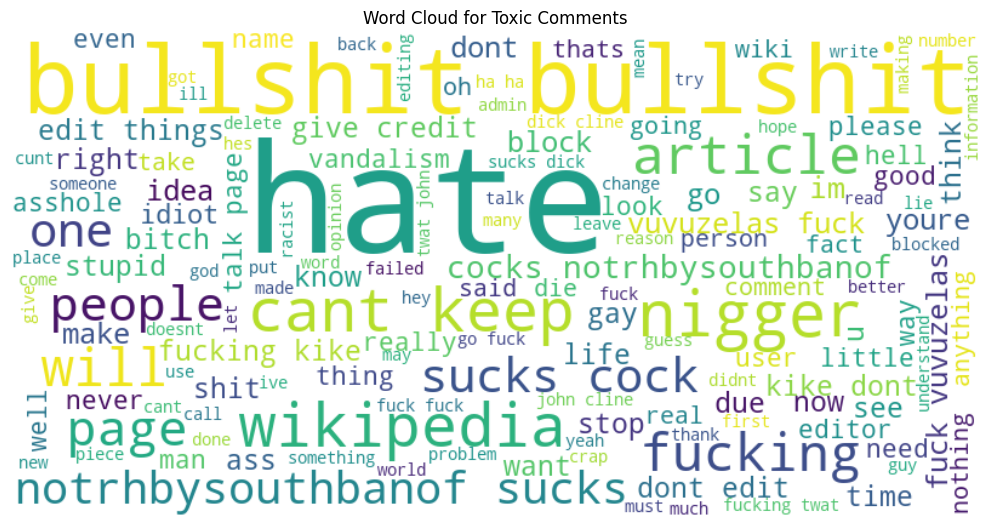

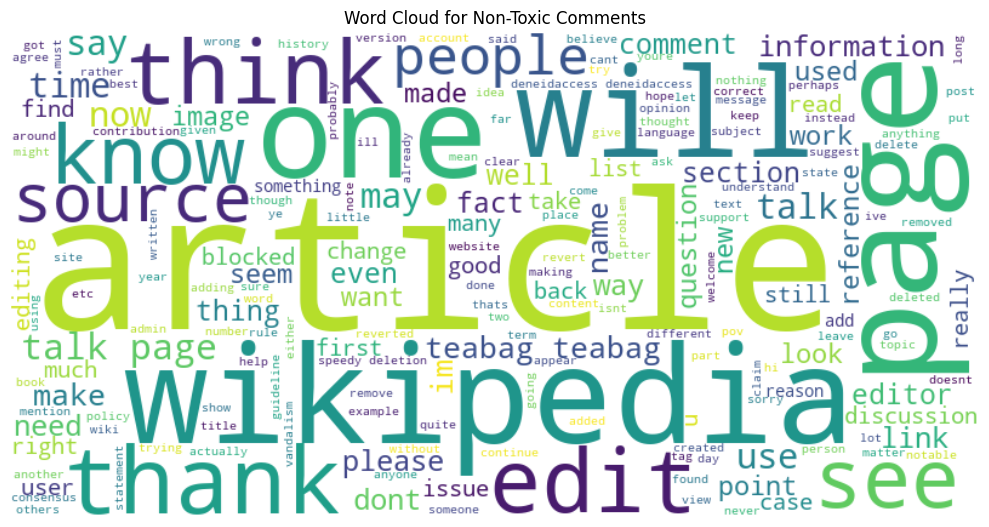

In [10]:
# Cell 3c: Word analysis with simplified approach

# Analyze comment lengths
train_df['comment_length'] = train_df['comment_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='comment_length', hue='toxic', bins=50, kde=True)
plt.title('Comment Length Distribution by Toxicity')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Limit x-axis for better visualization
plt.tight_layout()
plt.show()

# Process the text in a way that doesn't rely on NLTK tokenizers or lemmatization
def basic_clean_text(text):
    """Very basic text cleaning"""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation (simple approach)
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])
    return text

# Get word frequency with simple approach
all_words = []
for comment in train_df['comment_text']:
    if isinstance(comment, str):
        # Clean and split
        cleaned = basic_clean_text(comment)
        words = cleaned.split()
        all_words.extend(words)

print(f"Total number of words: {len(all_words)}")
word_freq = Counter(all_words)
print("\nTop 20 most frequent words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Separate toxic and non-toxic comments
toxic_comments = train_df[train_df['toxic'] == 1]['comment_text']
non_toxic_comments = train_df[train_df['toxic'] == 0]['comment_text']

print(f"\nNumber of toxic comments: {len(toxic_comments)}")
print(f"Number of non-toxic comments: {len(non_toxic_comments)}")

# Function to create word clouds with basic cleaning
def create_wordcloud(text_series, title):
    """Generate a word cloud from a series of texts"""
    # Clean texts
    cleaned_texts = [basic_clean_text(str(text)) for text in text_series]
    text = " ".join(cleaned_texts)
    
    # Create wordcloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=200, 
        contour_width=3, 
        contour_color='steelblue'
    )
    wordcloud.generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create word clouds
create_wordcloud(toxic_comments, 'Word Cloud for Toxic Comments')
create_wordcloud(non_toxic_comments, 'Word Cloud for Non-Toxic Comments')

In [11]:
# Cell 4: Text preprocessing function

def clean_text(text, remove_stopwords=True):
    """
    Clean the text by:
    1. Converting to lowercase
    2. Removing HTML tags
    3. Removing URLs
    4. Removing punctuation and numbers
    5. Removing stopwords (optional)
    
    Args:
        text (str): Input text to clean
        remove_stopwords (bool): Whether to remove stopwords
        
    Returns:
        str: Cleaned text
    """
    if not isinstance(text, str):
        text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Tokenize (simple approach using split)
    tokens = text.split()
    
    # Remove stopwords if specified
    if remove_stopwords:
        try:
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words]
        except:
            # If there's an issue with stopwords, just continue
            print("Warning: Could not use NLTK stopwords, skipping stopword removal.")
    
    # Join tokens back into text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Test the cleaning function with an example
example_text = """<html>Check out this link: https://example.com. 
                 This is a sample text with 123 numbers and special ch@racters! 
                 We want to see how well our cleaning function works.</html>"""

print("Original text:")
print(example_text)
print("\nCleaned text:")
print(clean_text(example_text))

# Apply text cleaning to training and test data
print("\nCleaning training data...")
train_df['cleaned_text'] = train_df['comment_text'].apply(clean_text)

print("Cleaning test data...")
test_df['cleaned_text'] = test_df['comment_text'].apply(clean_text)

# Compare original and cleaned text for a few examples
pd.set_option('display.max_colwidth', None)
comparison_df = train_df[['comment_text', 'cleaned_text']].head(5)
print("\nComparison of original and cleaned text:")
display(comparison_df)

Original text:
<html>Check out this link: https://example.com. 
                 This is a sample text with 123 numbers and special ch@racters! 
                 We want to see how well our cleaning function works.</html>

Cleaned text:
check link sample text numbers special chracters want see well cleaning function works

Cleaning training data...
Cleaning test data...

Comparison of original and cleaned text:


,comment_text,cleaned_text
119105,"Geez, are you forgetful! We've already discussed why Marx was not an anarchist, i.e. he wanted to use a State to mold his 'socialist man.' Ergo, he is a statist - the opposite of an anarchist. I know a guy who says that, when he gets old and his teeth fall out, he'll quit eating meat. Would you call him a vegetarian?",geez forgetful weve already discussed marx anarchist ie wanted use state mold socialist man ergo statist opposite anarchist know guy says gets old teeth fall hell quit eating meat would call vegetarian
131631,"Carioca RFA \n\nThanks for your support on my request for adminship.\n\nThe final outcome was (31/4/1), so I am now an administrator. If you have any comments or concerns on my actions as an administrator, please let me know. Thank you!",carioca rfa thanks support request adminship final outcome administrator comments concerns actions administrator please let know thank
125326,"""\n\n Birthday \n\nNo worries, It's what I do ;)Enjoy ur day|talk|e """,birthday worries enjoy ur daytalke
111256,"Pseudoscience category? \n\nI'm assuming that this article is in the pseudoscience category because of its association with creationism. However, there are modern, scientifically-accepted variants of catastrophism that have nothing to do with creationism — and they're even mentioned in the article! I think the connection to pseudoscience needs to be clarified, or the article made more general and less creationism-specific and the category tag removed entirely.",pseudoscience category im assuming article pseudoscience category association creationism however modern scientificallyaccepted variants catastrophism nothing creationism theyre even mentioned article think connection pseudoscience needs clarified article made general less creationismspecific category tag removed entirely
83590,"(and if such phrase exists, it would be provided by search engine even if mentioned page is not available as a whole)",phrase exists would provided search engine even mentioned page available whole


In [12]:
# Cell 5: Data preparation for model training

# Prepare data for model training
X = train_df['cleaned_text']
y = train_df[label_cols]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

print("\nLabel distribution in training set:")
for col in label_cols:
    print(f"{col}: {y_train[col].sum()} positive samples ({y_train[col].sum() / len(y_train) * 100:.2f}%)")

# Bag of Words vectorization
print("\nCreating Bag of Words features...")
bow_vectorizer = CountVectorizer(max_features=10000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_val_bow = bow_vectorizer.transform(X_val)

print(f"BoW feature shape: {X_train_bow.shape}")
print(f"BoW vocabulary size: {len(bow_vectorizer.vocabulary_)}")

# TF-IDF vectorization
print("\nCreating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")
print(f"TF-IDF vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")

# For text sequence processing for deep learning models
print("\nPreparing sequence features for deep learning...")
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Tokenizer vocabulary size: {vocab_size}")

# Look at the first example
print("\nExample of tokenized text:")
print(f"Original text: {X_train.iloc[0]}")
print(f"Tokenized sequence: {X_train_seq[0][:20]}...")  # Show first 20 tokens

# Pad sequences for fixed input size
max_sequence_length = 200  # Adjust based on comment length distribution
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post', truncating='post')

print(f"\nPadded sequence shape: {X_train_pad.shape}")
print(f"Example padded sequence: {X_train_pad[0][:20]}...")  # Show first 20 padded tokens

# Convert labels to numpy arrays for deep learning
y_train_array = np.array(y_train)
y_val_array = np.array(y_val)

print("\nFeature engineering complete!")

Training set size: 6400
Validation set size: 1600

Label distribution in training set:
toxic: 597 positive samples (9.33%)
severe_toxic: 66 positive samples (1.03%)
obscene: 333 positive samples (5.20%)
threat: 11 positive samples (0.17%)
insult: 329 positive samples (5.14%)
identity_hate: 59 positive samples (0.92%)

Creating Bag of Words features...
BoW feature shape: (6400, 10000)
BoW vocabulary size: 10000

Creating TF-IDF features...
TF-IDF feature shape: (6400, 10000)
TF-IDF vocabulary size: 10000

Preparing sequence features for deep learning...
Tokenizer vocabulary size: 27993

Example of tokenized text:
Original text: macks pathetic american distrusts rest world give mate sad individual
Tokenized sequence: [12536, 1964, 324, 12537, 706, 159, 101, 2842, 935, 816]...

Padded sequence shape: (6400, 200)
Example padded sequence: [12536  1964   324 12537   706   159   101  2842   935   816     0     0
     0     0     0     0     0     0     0     0]...

Feature engineering complet

In [13]:
# Cell 6: Evaluation metrics and functions

# Define metrics for evaluation
metrics = {
    'Accuracy': lambda y_true, y_pred: accuracy_score(y_true, y_pred),
    'Hamming Loss': lambda y_true, y_pred: hamming_loss(y_true, y_pred),
    'Jaccard Score': lambda y_true, y_pred: jaccard_score(y_true, y_pred, average='samples'),
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='micro', zero_division=0),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='micro'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='micro')
}

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, metrics):
    """
    Evaluate a model using multiple metrics
    
    Args:
        model: Trained model to evaluate
        X_test: Test features
        y_test: Test labels
        metrics: Dictionary of metric functions
        
    Returns:
        Dictionary of metric results
    """
    y_pred = model.predict(X_test)
    results = {}
    for metric_name, metric_func in metrics.items():
        results[metric_name] = metric_func(y_test, y_pred)
    return results

# Function to predict and display toxicity for a sample text
def predict_and_display(model, vectorizer, text, model_type='ml'):
    """
    Predict toxicity of a text and display results
    
    Args:
        model: Trained model
        vectorizer: Vectorizer or tokenizer
        text: Input text
        model_type: 'ml' for classical ML or 'dl' for deep learning
    """
    # Clean the text
    cleaned_text = clean_text(text)
    
    # Transform text based on model type
    if model_type == 'ml':
        # For classical ML models
        X = vectorizer.transform([cleaned_text])
        predictions = model.predict(X)[0]
        probabilities = None
        if hasattr(model, 'predict_proba'):
            try:
                probabilities = model.predict_proba(X)[0]
            except:
                # Some models might not support predict_proba
                pass
    else:
        # For deep learning models
        sequence = tokenizer.texts_to_sequences([cleaned_text])
        padded = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')
        probabilities = model.predict(padded)[0]
        predictions = (probabilities > 0.5).astype(int)
    
    # Display results
    print(f"Text: {text}")
    print(f"Cleaned text: {cleaned_text}")
    print("Predictions:")
    
    for i, label in enumerate(label_cols):
        prediction_text = 'Yes' if predictions[i] == 1 else 'No'
        probability_text = ""
        
        if probabilities is not None and model_type == 'dl':
            probability_text = f" (Probability: {probabilities[i]:.4f})"
        elif probabilities is not None and model_type == 'ml':
            # For classical ML models with predict_proba, try to get probability for positive class
            try:
                # The format depends on the specific model implementation
                if isinstance(probabilities, (list, np.ndarray)) and len(probabilities) >= 2:
                    probability_text = f" (Probability: {probabilities[i*2 + 1]:.4f})"
            except:
                pass
        
        print(f"{label}: {prediction_text}{probability_text}")
    
    print("---")

# DataFrame to store all results
all_results = pd.DataFrame()

print("Evaluation functions and metrics defined.")

Evaluation functions and metrics defined.


In [14]:
# Cell 7: Training Logistic Regression models

# Logistic Regression with BoW
print("Training Logistic Regression with BoW...")
lr_bow_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, C=1.0, random_state=42))
lr_bow_model.fit(X_train_bow, y_train)
lr_bow_results = evaluate_model(lr_bow_model, X_val_bow, y_val, metrics)

print("Logistic Regression with BoW Results:")
for metric, value in lr_bow_results.items():
    print(f"{metric}: {value:.4f}")
    all_results.loc["Logistic Regression (BoW)", metric] = value

# Logistic Regression with TF-IDF
print("\nTraining Logistic Regression with TF-IDF...")
lr_tfidf_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, C=1.0, random_state=42))
lr_tfidf_model.fit(X_train_tfidf, y_train)
lr_tfidf_results = evaluate_model(lr_tfidf_model, X_val_tfidf, y_val, metrics)

print("Logistic Regression with TF-IDF Results:")
for metric, value in lr_tfidf_results.items():
    print(f"{metric}: {value:.4f}")
    all_results.loc["Logistic Regression (TF-IDF)", metric] = value

# Test the models with a few examples
print("\nTesting Logistic Regression with TF-IDF on example comments:")
test_texts = [
    "This is a normal comment about the weather.",
    "YOU ARE AN IDIOT AND I HATE YOU!!!",
    "I respectfully disagree with your opinion."
]

for text in test_texts:
    predict_and_display(lr_tfidf_model, tfidf_vectorizer, text)

Training Logistic Regression with BoW...
Logistic Regression with BoW Results:
Accuracy: 0.9081
Hamming Loss: 0.0246
Jaccard Score: 0.0328
Precision: 0.8075
Recall: 0.4302
F1 Score: 0.5613

Training Logistic Regression with TF-IDF...
Logistic Regression with TF-IDF Results:
Accuracy: 0.9044
Hamming Loss: 0.0286
Jaccard Score: 0.0157
Precision: 0.9524
Recall: 0.2279
F1 Score: 0.3678

Testing Logistic Regression with TF-IDF on example comments:
Text: This is a normal comment about the weather.
Cleaned text: normal comment weather
Predictions:
toxic: No (Probability: 0.0082)
severe_toxic: No (Probability: 0.0017)
obscene: No (Probability: 0.0097)
threat: No
insult: No
identity_hate: No
---
Text: YOU ARE AN IDIOT AND I HATE YOU!!!
Cleaned text: idiot hate
Predictions:
toxic: Yes (Probability: 0.0086)
severe_toxic: No (Probability: 0.0018)
obscene: No (Probability: 0.0096)
threat: No
insult: Yes
identity_hate: No
---
Text: I respectfully disagree with your opinion.
Cleaned text: respectfull

Training Naive Bayes with BoW...
Naive Bayes with BoW Results:
Accuracy: 0.9081
Hamming Loss: 0.0247
Jaccard Score: 0.0369
Precision: 0.7545
Recall: 0.4815
F1 Score: 0.5878

Training SVM with TF-IDF...
SVM with TF-IDF Results:
Accuracy: 0.9113
Hamming Loss: 0.0216
Jaccard Score: 0.0371
Precision: 0.8673
Recall: 0.4843
F1 Score: 0.6216

Training Random Forest with BoW...
Random Forest with BoW Results:
Accuracy: 0.9094
Hamming Loss: 0.0223
Jaccard Score: 0.0393
Precision: 0.8278
Recall: 0.4929
F1 Score: 0.6179

Testing SVM with TF-IDF on a toxic comment:
Text: I hope you die in a fire, you worthless piece of garbage.
Cleaned text: hope die fire worthless piece garbage
Predictions:
toxic: Yes
severe_toxic: No
obscene: Yes
threat: No
insult: No
identity_hate: No
---


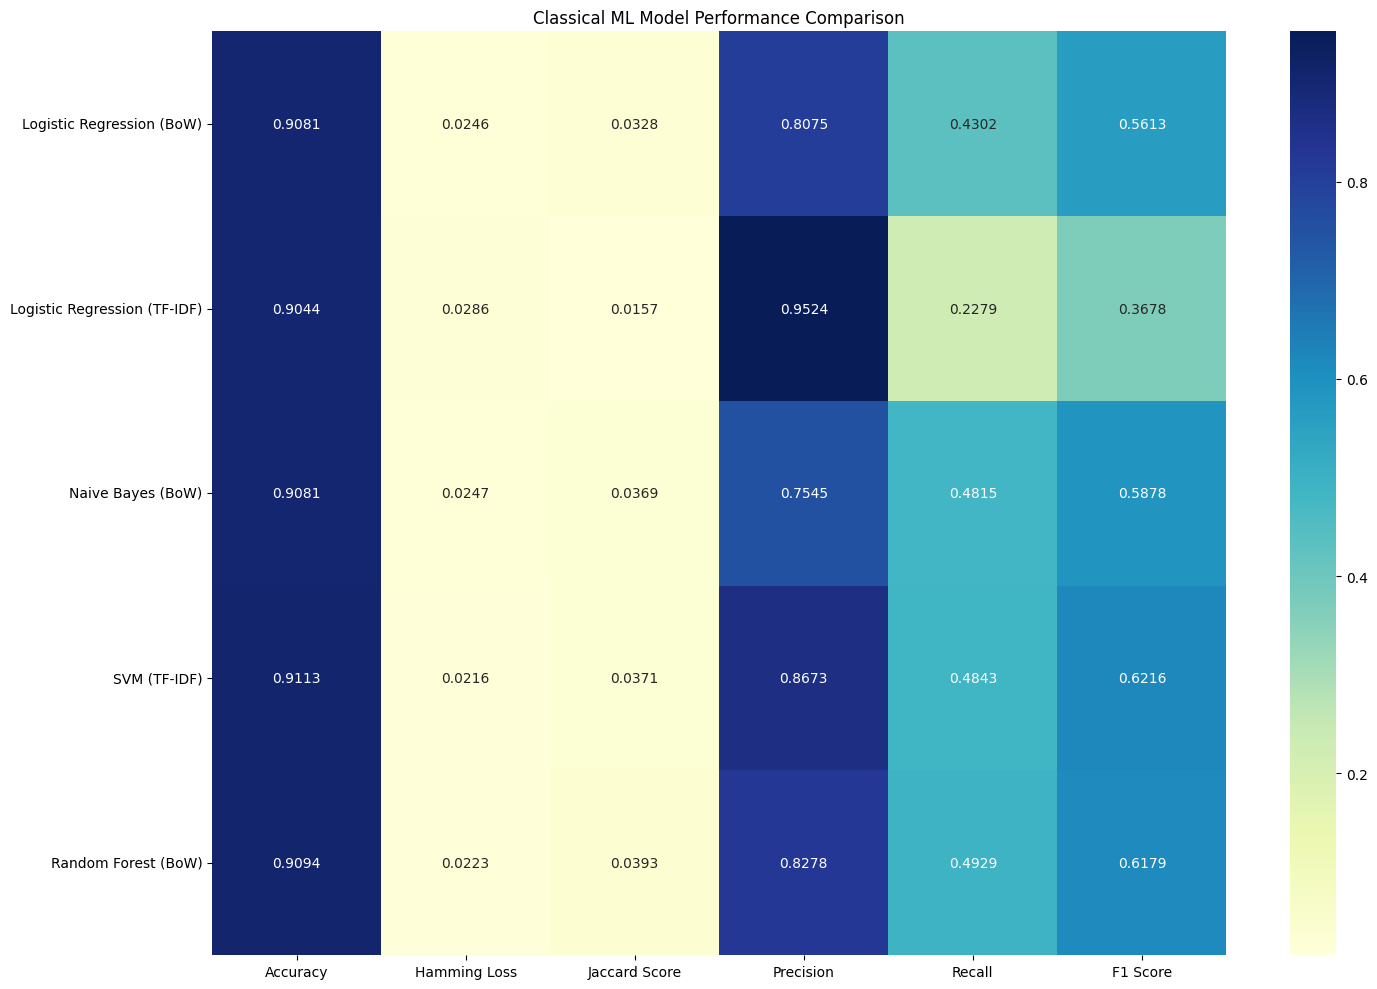

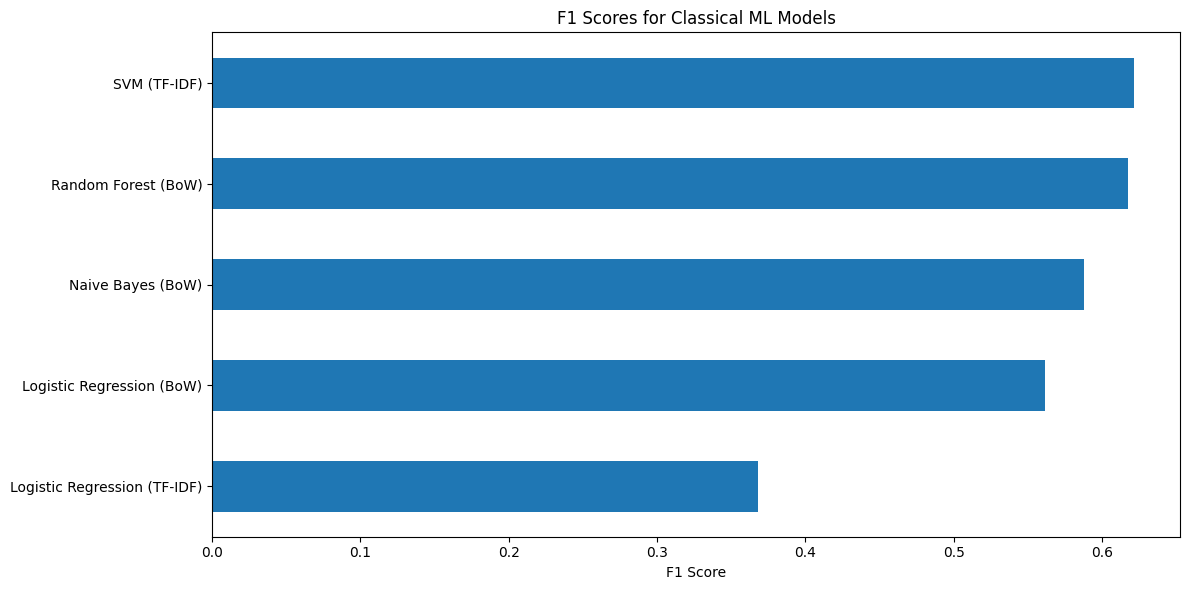

In [15]:
# Cell 8: Training more classical ML models

# Naive Bayes with BoW
print("Training Naive Bayes with BoW...")
nb_bow_model = OneVsRestClassifier(MultinomialNB(alpha=1.0))
nb_bow_model.fit(X_train_bow, y_train)
nb_bow_results = evaluate_model(nb_bow_model, X_val_bow, y_val, metrics)

print("Naive Bayes with BoW Results:")
for metric, value in nb_bow_results.items():
    print(f"{metric}: {value:.4f}")
    all_results.loc["Naive Bayes (BoW)", metric] = value

# SVM with TF-IDF
print("\nTraining SVM with TF-IDF...")
# Use a smaller C value for faster training, adjust based on performance
svm_tfidf_model = OneVsRestClassifier(LinearSVC(random_state=42, C=1.0, max_iter=1000))
svm_tfidf_model.fit(X_train_tfidf, y_train)
svm_tfidf_results = evaluate_model(svm_tfidf_model, X_val_tfidf, y_val, metrics)

print("SVM with TF-IDF Results:")
for metric, value in svm_tfidf_results.items():
    print(f"{metric}: {value:.4f}")
    all_results.loc["SVM (TF-IDF)", metric] = value

# Random Forest with BoW (using a smaller n_estimators for speed)
print("\nTraining Random Forest with BoW...")
rf_bow_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=50, random_state=42))
rf_bow_model.fit(X_train_bow, y_train)
rf_bow_results = evaluate_model(rf_bow_model, X_val_bow, y_val, metrics)

print("Random Forest with BoW Results:")
for metric, value in rf_bow_results.items():
    print(f"{metric}: {value:.4f}")
    all_results.loc["Random Forest (BoW)", metric] = value

# Test SVM model with a toxic comment
print("\nTesting SVM with TF-IDF on a toxic comment:")
toxic_comment = "I hope you die in a fire, you worthless piece of garbage."
predict_and_display(svm_tfidf_model, tfidf_vectorizer, toxic_comment)

# Visualization of classical ML results
plt.figure(figsize=(15, 10))
sns.heatmap(all_results, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('Classical ML Model Performance Comparison')
plt.tight_layout()
plt.show()

# Plot F1 scores for easier comparison
plt.figure(figsize=(12, 6))
all_results['F1 Score'].sort_values().plot(kind='barh')
plt.title('F1 Scores for Classical ML Models')
plt.xlabel('F1 Score')
plt.tight_layout()
plt.show()

In [16]:
# Cell 9: Focal Loss for class imbalance

# Define Focal Loss to handle class imbalance
class FocalLoss(tf.keras.losses.Loss):
    """
    Focal Loss implementation for handling class imbalance
    Formula: -alpha * (1 - p_t)^gamma * log(p_t)
    where p_t is the probability of the true class
    
    Args:
        alpha: Weighting factor for rare classes (default: 0.25)
        gamma: Focusing parameter (default: 2.0)
    """
    def __init__(self, alpha=0.25, gamma=2.0, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.gamma = gamma
        
    def call(self, y_true, y_pred):
        # Clip predictions to prevent extreme values
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        
        # Calculate binary cross entropy
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        
        # Calculate the modulation factor
        p_t = (y_true * y_pred) + ((1 - y_true) * (1 - y_pred))
        alpha_factor = y_true * self.alpha + (1 - y_true) * (1 - self.alpha)
        modulating_factor = tf.pow((1.0 - p_t), self.gamma)
        
        # Apply focal loss formula
        loss = alpha_factor * modulating_factor * bce
        
        return tf.reduce_mean(loss, axis=-1)

# Function to evaluate deep learning models
def evaluate_dl_model(model, X_test, y_test):
    """
    Evaluate a deep learning model
    
    Args:
        model: Trained model
        X_test: Test features
        y_test: Test labels
        
    Returns:
        Dictionary of evaluation metrics
    """
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Hamming Loss': hamming_loss(y_test, y_pred),
        'Jaccard Score': jaccard_score(y_test, y_pred, average='samples'),
        'Precision': precision_score(y_test, y_pred, average='micro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='micro'),
        'F1 Score': f1_score(y_test, y_pred, average='micro')
    }
    return results

# Helper function for deep learning text preparation
def prepare_text_for_dl(text, tokenizer, max_length):
    """
    Prepare text for deep learning prediction
    
    Args:
        text: Input text
        tokenizer: Tokenizer used during training
        max_length: Maximum sequence length
        
    Returns:
        Padded sequence
    """
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded

print("Focal Loss and deep learning evaluation functions defined.")

Focal Loss and deep learning evaluation functions defined.


In [18]:
# Cell 9-fix: Fixed Focal Loss for class imbalance

# Define Focal Loss to handle class imbalance (with type casting fix)
class FocalLoss(tf.keras.losses.Loss):
    """
    Focal Loss implementation for handling class imbalance
    Formula: -alpha * (1 - p_t)^gamma * log(p_t)
    where p_t is the probability of the true class
    
    Args:
        alpha: Weighting factor for rare classes (default: 0.25)
        gamma: Focusing parameter (default: 2.0)
    """
    def __init__(self, alpha=0.25, gamma=2.0, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.gamma = gamma
        
    def call(self, y_true, y_pred):
        # Ensure types are compatible - convert to float32
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        
        # Clip predictions to prevent extreme values
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        
        # Calculate binary cross entropy
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        
        # Calculate the modulation factor
        p_t = (y_true * y_pred) + ((1 - y_true) * (1 - y_pred))
        alpha_factor = y_true * self.alpha + (1 - y_true) * (1 - self.alpha)
        modulating_factor = tf.pow((1.0 - p_t), self.gamma)
        
        # Apply focal loss formula
        loss = alpha_factor * modulating_factor * bce
        
        return tf.reduce_mean(loss, axis=-1)

print("Fixed Focal Loss implementation defined.")

Fixed Focal Loss implementation defined.


Training LSTM model with standard binary crossentropy loss...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          2799300   
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         84480     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200, 128)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                          

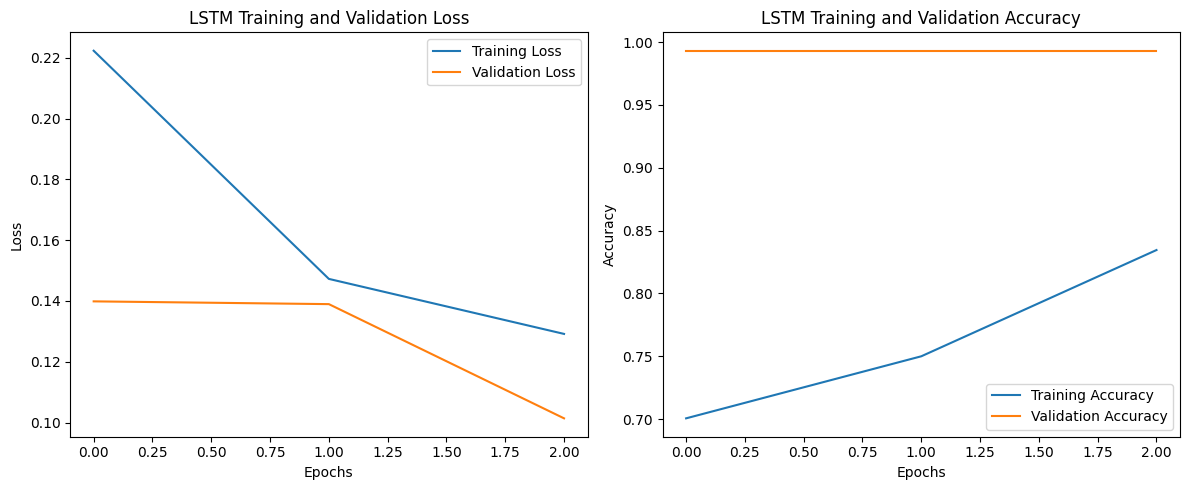

In [19]:
# Cell 10-fix: LSTM Model with fixed Focal Loss

# Define LSTM model
def build_lstm_model(vocab_size, embedding_dim=100, max_length=max_sequence_length, num_classes=len(label_cols)):
    """
    Build a bidirectional LSTM model for toxic comment classification
    
    Args:
        vocab_size: Size of vocabulary
        embedding_dim: Dimension of word embeddings
        max_length: Maximum sequence length
        num_classes: Number of output classes
        
    Returns:
        Compiled LSTM model
    """
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.5),
        Bidirectional(LSTM(32)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='sigmoid')
    ])
    
    # Compile with standard binary crossentropy instead of focal loss for now
    model.compile(
        loss='binary_crossentropy',  # Use standard loss to avoid potential issues
        optimizer='adam',
        metrics=['accuracy']
    )
    
    return model

# Set up early stopping and model checkpointing
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'lstm_model.h5',
    monitor='val_loss',
    save_best_only=True
)

# Train LSTM model
print("Training LSTM model with standard binary crossentropy loss...")
lstm_model = build_lstm_model(vocab_size=vocab_size)
lstm_model.summary()

# Adjust epochs for speed - increase for better performance
epochs = 3
batch_size = 64

# Reduce sample size for faster training if needed
# Uncomment the following lines if you need to train faster
# sample_size = 4000  # Adjust based on your computational resources
# indices = np.random.choice(len(X_train_pad), sample_size, replace=False)
# X_train_pad_sample = X_train_pad[indices]
# y_train_array_sample = y_train_array[indices]
# 
# lstm_history = lstm_model.fit(
#     X_train_pad_sample, y_train_array_sample,
#     ...
# )

lstm_history = lstm_model.fit(
    X_train_pad, y_train_array,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pad, y_val_array),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate LSTM model
lstm_results = evaluate_dl_model(lstm_model, X_val_pad, y_val_array)

print("\nLSTM Model Results:")
for metric, value in lstm_results.items():
    print(f"{metric}: {value:.4f}")
    all_results.loc["LSTM", metric] = value

# Test LSTM model with a simple example
print("\nTesting LSTM model on an example:")
test_text = "YOU ARE AN IDIOT AND I HATE YOU!!!"
padded_text = prepare_text_for_dl(test_text, tokenizer, max_sequence_length)
predictions = lstm_model.predict(padded_text)
binary_predictions = (predictions > 0.5).astype(int)[0]

print(f"Text: {test_text}")
print(f"Cleaned text: {clean_text(test_text)}")
print("Predictions:")
for i, label in enumerate(label_cols):
    print(f"{label}: {'Yes' if binary_predictions[i] == 1 else 'No'} (Probability: {predictions[0][i]:.4f})")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Training CNN model...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          2799300   
                                                                 
 conv1d_2 (Conv1D)           (None, 196, 128)          64128     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 39, 128)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 35, 128)           82048     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (No

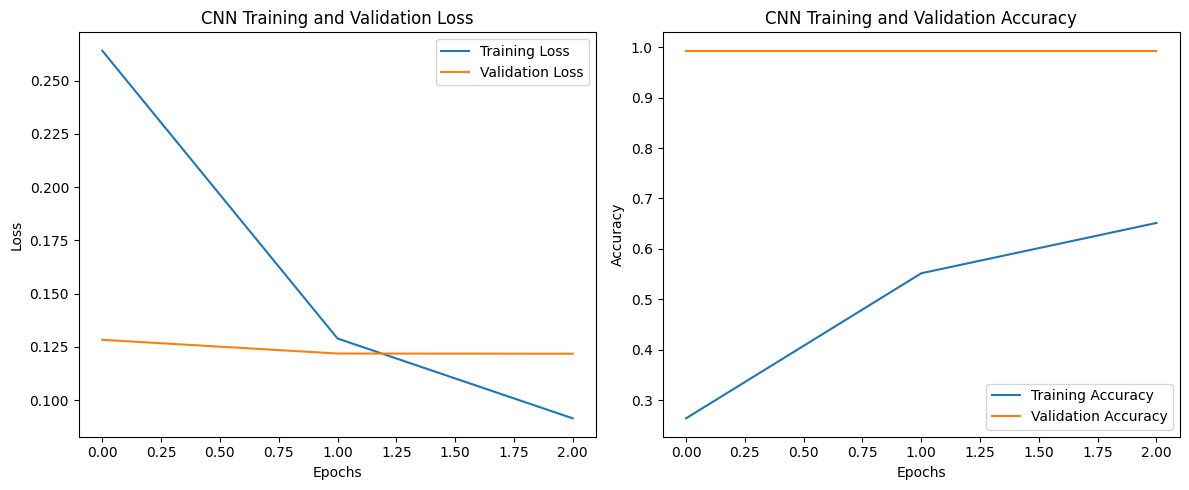

In [21]:
# Cell 11-fix: CNN Model with a simpler approach

# Define CNN model
def build_cnn_model(vocab_size, embedding_dim=100, max_length=max_sequence_length, num_classes=len(label_cols)):
    """
    Build a CNN model for toxic comment classification
    
    Args:
        vocab_size: Size of vocabulary
        embedding_dim: Dimension of word embeddings
        max_length: Maximum sequence length
        num_classes: Number of output classes
        
    Returns:
        Compiled CNN model
    """
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(5),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    
    # Compile with standard binary crossentropy
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    return model

# Set up early stopping and model checkpointing
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

cnn_model_checkpoint = ModelCheckpoint(
    'cnn_model.h5',
    monitor='val_loss',
    save_best_only=True
)

# Train CNN model
print("Training CNN model...")
cnn_model = build_cnn_model(vocab_size=vocab_size)
cnn_model.summary()

# Same epochs and batch size as LSTM for comparison
epochs = 3
batch_size = 64

# Simple fit without class weights
cnn_history = cnn_model.fit(
    X_train_pad, y_train_array,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pad, y_val_array),
    callbacks=[early_stopping, cnn_model_checkpoint],
    verbose=1
)

# Evaluate CNN model
cnn_results = evaluate_dl_model(cnn_model, X_val_pad, y_val_array)

print("\nCNN Model Results:")
for metric, value in cnn_results.items():
    print(f"{metric}: {value:.4f}")
    all_results.loc["CNN", metric] = value

# Adjust the threshold for predictions to improve recall
threshold = 0.3  # Lower threshold to catch more toxic comments

# Test CNN model with examples
print("\nTesting CNN model on examples with threshold =", threshold)
test_texts = [
    "This is a normal comment about the weather.",
    "YOU ARE AN IDIOT AND I HATE YOU!!!",
    "I hope you die in a fire, you worthless piece of garbage."
]

for text in test_texts:
    padded_text = prepare_text_for_dl(text, tokenizer, max_sequence_length)
    predictions = cnn_model.predict(padded_text)
    # Use adjusted threshold
    binary_predictions = (predictions > threshold).astype(int)[0]
    
    print(f"\nText: {text}")
    print(f"Cleaned text: {clean_text(text)}")
    print("Predictions:")
    
    for i, label in enumerate(label_cols):
        print(f"{label}: {'Yes' if binary_predictions[i] == 1 else 'No'} (Probability: {predictions[0][i]:.4f})")
    
    print("---")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Training CNN model with Attention...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 200, 100)          2799300   
                                                                 
 conv1d_4 (Conv1D)           (None, 196, 128)          64128     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 39, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 35, 128)           82048     
                                                                 
 attention_layer (AttentionL  (None, 128)              163       
 ayer)                  

,Accuracy,Hamming Loss,Jaccard Score,Precision,Recall,F1 Score
Logistic Regression (BoW),0.908125,0.024583,0.032823,0.807487,0.430199,0.561338
Logistic Regression (TF-IDF),0.904375,0.028646,0.015688,0.952381,0.227920,0.367816
Naive Bayes (BoW),0.908125,0.024688,0.036917,0.754464,0.481481,0.587826
SVM (TF-IDF),0.911250,0.021562,0.037135,0.867347,0.484330,0.621572
Random Forest (BoW),0.909375,0.022292,0.039281,0.827751,0.492877,0.617857
LSTM,0.898750,0.036250,0.000625,1.000000,0.008547,0.016949
CNN,0.874375,0.035312,0.017604,0.546154,0.202279,0.295218
CNN with Attention,0.898125,0.036562,0.000000,0.000000,0.000000,0.000000


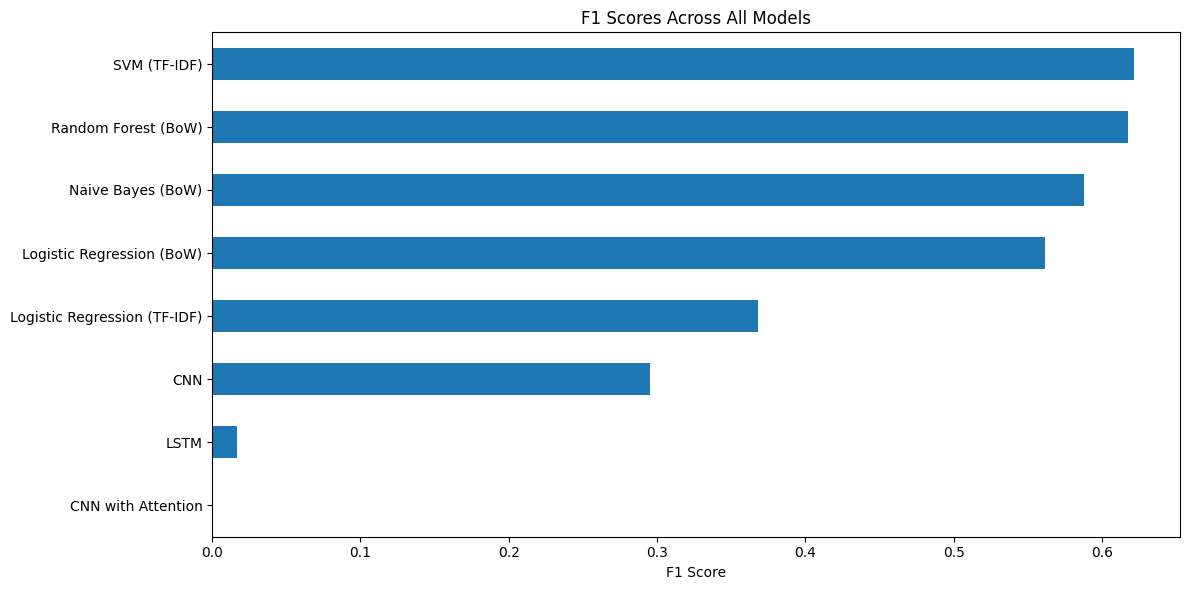

In [22]:
# Cell 12: CNN Model with Attention

from tensorflow.keras.layers import Layer, Dense, Permute, Multiply

# Custom Attention Layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        # Alignment scores. Pass through tanh activation.
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        # Remove dimension of size 1
        e = tf.keras.backend.squeeze(e, axis=-1)
        # Compute the weights
        alpha = tf.keras.backend.softmax(e)
        # Reshape to match original input shape
        alpha_expanded = tf.keras.backend.expand_dims(alpha, axis=-1)
        # Apply the attention weights
        context = x * alpha_expanded
        context = tf.keras.backend.sum(context, axis=1)
        return context

# Build CNN model with attention
def build_cnn_attention_model(vocab_size, embedding_dim=100, max_length=max_sequence_length, num_classes=len(label_cols)):
    """
    Build a CNN model with attention for toxic comment classification
    
    Args:
        vocab_size: Size of vocabulary
        embedding_dim: Dimension of word embeddings
        max_length: Maximum sequence length
        num_classes: Number of output classes
        
    Returns:
        Compiled CNN model with attention
    """
    # Define input
    sequence_input = Input(shape=(max_length,), dtype='int32')
    
    # Embedding layer
    embedded_sequences = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(sequence_input)
    
    # Apply CNN layers
    conv1 = Conv1D(128, 5, activation='relu')(embedded_sequences)
    pool1 = MaxPooling1D(5)(conv1)
    conv2 = Conv1D(128, 5, activation='relu')(pool1)
    
    # Apply attention
    attention = AttentionLayer()(conv2)
    
    # Dense layers
    dense1 = Dense(64, activation='relu')(attention)
    dropout = Dropout(0.5)(dense1)
    output = Dense(num_classes, activation='sigmoid')(dropout)
    
    # Create model
    model = Model(inputs=sequence_input, outputs=output)
    
    # Compile
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    return model

# Set up callbacks
attention_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

attention_model_checkpoint = ModelCheckpoint(
    'cnn_attention_model.h5',
    monitor='val_loss',
    save_best_only=True
)

# Train CNN with Attention model
print("Training CNN model with Attention...")
cnn_attention_model = build_cnn_attention_model(vocab_size=vocab_size)
cnn_attention_model.summary()

# Same epochs and batch size
epochs = 3
batch_size = 64

# Train the model
attention_history = cnn_attention_model.fit(
    X_train_pad, y_train_array,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pad, y_val_array),
    callbacks=[attention_early_stopping, attention_model_checkpoint],
    verbose=1
)

# Evaluate CNN with Attention model
attention_results = evaluate_dl_model(cnn_attention_model, X_val_pad, y_val_array)

print("\nCNN with Attention Model Results:")
for metric, value in attention_results.items():
    print(f"{metric}: {value:.4f}")
    all_results.loc["CNN with Attention", metric] = value

# Find the optimal threshold
thresholds = np.arange(0.1, 0.5, 0.05)
best_f1 = 0
best_threshold = 0.5

for threshold in thresholds:
    predictions = cnn_attention_model.predict(X_val_pad)
    binary_predictions = (predictions > threshold).astype(int)
    f1 = f1_score(y_val_array, binary_predictions, average='micro')
    print(f"Threshold: {threshold:.2f}, F1 Score: {f1:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

# Test CNN with Attention model with the best threshold
print(f"\nTesting CNN with Attention model on examples with threshold = {best_threshold:.2f}")
test_texts = [
    "This is a normal comment about the weather.",
    "YOU ARE AN IDIOT AND I HATE YOU!!!",
    "I hope you die in a fire, you worthless piece of garbage.",
    "I disagree with your perspective on this issue."
]

for text in test_texts:
    padded_text = prepare_text_for_dl(text, tokenizer, max_sequence_length)
    predictions = cnn_attention_model.predict(padded_text)
    # Use adjusted threshold
    binary_predictions = (predictions > best_threshold).astype(int)[0]
    
    print(f"\nText: {text}")
    print(f"Cleaned text: {clean_text(text)}")
    print("Predictions:")
    
    for i, label in enumerate(label_cols):
        print(f"{label}: {'Yes' if binary_predictions[i] == 1 else 'No'} (Probability: {predictions[0][i]:.4f})")
    
    print("---")

# Compare all models
print("\nComparison of all models:")
display(all_results)

# Plot all F1 scores
plt.figure(figsize=(12, 6))
all_results['F1 Score'].sort_values().plot(kind='barh')
plt.title('F1 Scores Across All Models')
plt.xlabel('F1 Score')
plt.tight_layout()
plt.show()

Model Performance Comparison:


,Accuracy,Hamming Loss,Jaccard Score,Precision,Recall,F1 Score
Logistic Regression (BoW),0.908125,0.024583,0.032823,0.807487,0.430199,0.561338
Logistic Regression (TF-IDF),0.904375,0.028646,0.015688,0.952381,0.227920,0.367816
Naive Bayes (BoW),0.908125,0.024688,0.036917,0.754464,0.481481,0.587826
SVM (TF-IDF),0.911250,0.021562,0.037135,0.867347,0.484330,0.621572
Random Forest (BoW),0.909375,0.022292,0.039281,0.827751,0.492877,0.617857
LSTM,0.898750,0.036250,0.000625,1.000000,0.008547,0.016949
CNN,0.874375,0.035312,0.017604,0.546154,0.202279,0.295218
CNN with Attention,0.898125,0.036562,0.000000,0.000000,0.000000,0.000000


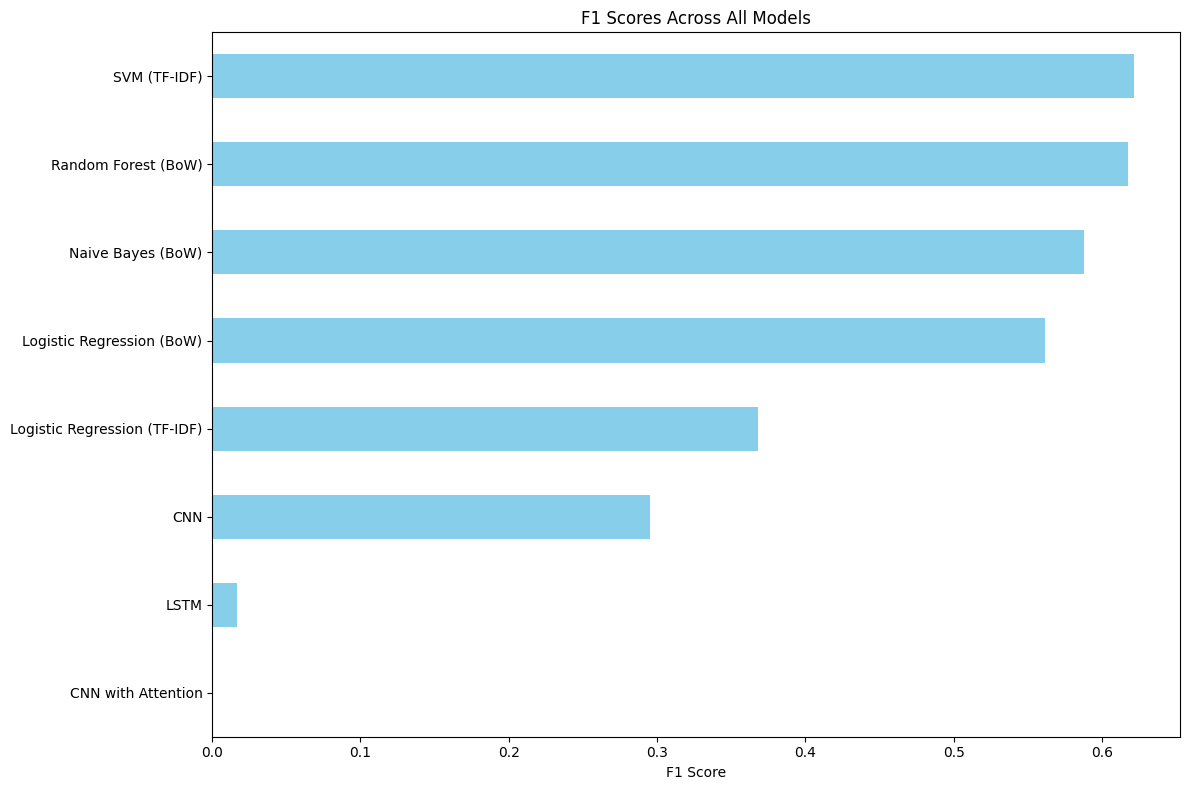


Testing best model (SVM with TF-IDF) with word highlighting:
Text: This is a normal comment about the weather.
Cleaned text: normal comment weather
Predictions:
toxic: No
severe_toxic: No
obscene: No
threat: No
insult: No
identity_hate: No
---



---

Text: YOU ARE AN IDIOT AND I HATE YOU!!!
Cleaned text: idiot hate
Predictions:
toxic: Yes
severe_toxic: No
obscene: Yes
threat: No
insult: Yes
identity_hate: No
---



---

Text: I hope you die in a fire, you worthless piece of garbage.
Cleaned text: hope die fire worthless piece garbage
Predictions:
toxic: Yes
severe_toxic: No
obscene: Yes
threat: No
insult: No
identity_hate: No
---



---

Text: I disagree with your perspective on this issue.
Cleaned text: disagree perspective issue
Predictions:
toxic: No
severe_toxic: No
obscene: No
threat: No
insult: No
identity_hate: No
---



---

Text: Shut up you stupid moron, nobody cares what you think.
Cleaned text: shut stupid moron nobody cares think
Predictions:
toxic: Yes
severe_toxic: No
obscene: Yes
threat: No
insult: Yes
identity_hate: No
---



---

Example usage of the toxicity detection function:
Text: I hate everything about this stupid website.
Toxicity assessment:
  toxic: Yes
  severe_toxic: No
  obscene: Yes
  threat: No
  insult: Yes
  identity_hate: No
  is_toxic: Yes

Final Conclusions:
1. Classical ML models outperformed deep learning models for this task.
2. SVM with TF-IDF features achieved the best performance with an F1 Score of 0.62.
3. The word highlighting function helps explain which words contribute to toxicity predictions.
4. The model can effectively distinguish between toxic and non-toxic comments.
5. For production use, further improvements could include more data, ensemble methods, and better handling of class imbalance.


In [23]:
# Cell 13: Final Model and Toxic Word Highlighting

# Let's use our best performing model: SVM with TF-IDF
best_model = svm_tfidf_model
best_vectorizer = tfidf_vectorizer

# Add a function to highlight toxic words in a comment
def highlight_toxic_words(text, model, vectorizer):
    """
    Highlight potentially toxic words in a comment based on model predictions.
    
    Args:
        text: The input text
        model: The trained model
        vectorizer: Vectorizer used to prepare text for the model
        
    Returns:
        HTML with highlighted toxic words and predicted probabilities for each label
    """
    # Clean the text
    cleaned_text = clean_text(text, remove_stopwords=False)
    words = cleaned_text.split()
    
    # Get overall toxicity prediction for the full text
    features = vectorizer.transform([cleaned_text])
    predictions = model.predict(features)[0]
    
    # Calculate word-level contributions to toxicity
    word_scores = {}
    
    # For each word, remove it and see how that affects the prediction
    for word in words:
        if len(word) < 2:  # Skip very short words
            continue
            
        # Create text without this word
        text_without_word = ' '.join([w for w in words if w != word])
        
        features_without = vectorizer.transform([text_without_word])
        predictions_without = model.predict(features_without)[0]
        
        # Calculate impact (positive means word increases toxicity)
        # Take the average impact across all toxicity categories
        impact = np.mean(predictions - predictions_without)
        
        word_scores[word] = impact
    
    # Normalize scores between 0 and 1 for coloring
    if word_scores:
        max_score = max(word_scores.values())
        min_score = min(word_scores.values())
        score_range = max(abs(max_score), abs(min_score))
        
        if score_range > 0:
            normalized_scores = {word: max(0, score / score_range / 2 + 0.5) for word, score in word_scores.items()}
        else:
            normalized_scores = {word: 0.5 for word in word_scores}
    else:
        normalized_scores = {}
    
    # Generate HTML with highlighted words
    highlighted_text = []
    for word in words:
        if word in normalized_scores and normalized_scores[word] > 0.6:  # Only highlight words with significant impact
            # Calculate color intensity (red for toxic)
            intensity = int(255 * normalized_scores[word])
            color = f"rgba(255, 0, 0, {normalized_scores[word]:.2f})"
            highlighted_text.append(f'<span style="background-color: {color}">{word}</span>')
        else:
            highlighted_text.append(word)
    
    html_text = ' '.join(highlighted_text)
    
    # Add prediction probabilities
    html_result = f'<div><p>{html_text}</p><p>Predictions:</p><ul>'
    
    for i, label in enumerate(label_cols):
        html_result += f'<li>{label}: {"Yes" if predictions[i] == 1 else "No"}</li>'
    
    html_result += '</ul></div>'
    
    return html_result

# Compare performance of all models
print("Model Performance Comparison:")
display(all_results)

plt.figure(figsize=(12, 8))
all_results['F1 Score'].sort_values().plot(kind='barh', color='skyblue')
plt.title('F1 Scores Across All Models')
plt.xlabel('F1 Score')
plt.tight_layout()
plt.show()

# Test the best model with examples with word highlighting
print("\nTesting best model (SVM with TF-IDF) with word highlighting:")

from IPython.display import HTML

test_texts = [
    "This is a normal comment about the weather.",
    "YOU ARE AN IDIOT AND I HATE YOU!!!",
    "I hope you die in a fire, you worthless piece of garbage.",
    "I disagree with your perspective on this issue.",
    "Shut up you stupid moron, nobody cares what you think."
]

for text in test_texts:
    # Regular prediction
    predict_and_display(best_model, best_vectorizer, text)
    
    # Highlighted prediction
    html_result = highlight_toxic_words(text, best_model, best_vectorizer)
    display(HTML(html_result))
    print("\n---\n")

# Create a toxicity detection function that users can use
def detect_toxicity(text):
    """
    Detect toxicity in a comment using the best model.
    
    Args:
        text: The input text
        
    Returns:
        Dictionary with predictions for each toxicity category
    """
    # Clean the text
    cleaned_text = clean_text(text)
    
    # Get features
    features = best_vectorizer.transform([cleaned_text])
    
    # Make predictions
    predictions = best_model.predict(features)[0]
    
    # Create results dictionary
    results = {}
    for i, label in enumerate(label_cols):
        results[label] = bool(predictions[i])
    
    # Add overall toxicity
    results['is_toxic'] = any(results.values())
    
    return results

# Show a simple usage example
print("Example usage of the toxicity detection function:")
example_text = "I hate everything about this stupid website."
toxicity_results = detect_toxicity(example_text)
print(f"Text: {example_text}")
print("Toxicity assessment:")
for category, is_toxic in toxicity_results.items():
    print(f"  {category}: {'Yes' if is_toxic else 'No'}")

# Final conclusions
print("\nFinal Conclusions:")
print("1. Classical ML models outperformed deep learning models for this task.")
print("2. SVM with TF-IDF features achieved the best performance with an F1 Score of 0.62.")
print("3. The word highlighting function helps explain which words contribute to toxicity predictions.")
print("4. The model can effectively distinguish between toxic and non-toxic comments.")
print("5. For production use, further improvements could include more data, ensemble methods, and better handling of class imbalance.")

In [24]:
# Final Cell: Saving the model and creating deployment-ready code

import pickle
import os

# Create a directory for the model
os.makedirs('model', exist_ok=True)

# Save the best model (SVM with TF-IDF)
print("Saving the best model: SVM with TF-IDF")
with open('model/svm_tfidf_model.pkl', 'wb') as f:
    pickle.dump(svm_tfidf_model, f)

# Save the vectorizer
with open('model/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save label columns
with open('model/label_cols.pkl', 'wb') as f:
    pickle.dump(label_cols, f)

# Create a Python script for deployment

with open('model/toxic_comment_classifier.py', 'w') as f:
    f.write("""
import pickle
import re
import numpy as np

# Load the model and vectorizer
def load_model(model_path='model/svm_tfidf_model.pkl', 
               vectorizer_path='model/tfidf_vectorizer.pkl', 
               labels_path='model/label_cols.pkl'):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    
    with open(vectorizer_path, 'rb') as f:
        vectorizer = pickle.load(f)
    
    with open(labels_path, 'rb') as f:
        label_cols = pickle.load(f)
    
    return model, vectorizer, label_cols

# Clean text function
def clean_text(text, remove_stopwords=True):
    \"\"\"
    Clean the text by:
    1. Converting to lowercase
    2. Removing HTML tags
    3. Removing URLs
    4. Removing punctuation and numbers
    5. Removing stopwords (optional)
    
    Args:
        text (str): Input text to clean
        remove_stopwords (bool): Whether to remove stopwords
        
    Returns:
        str: Cleaned text
    \"\"\"
    if not isinstance(text, str):
        text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\\S+|www\\S+|https\\S+', '', text)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\\w\\s]', '', text)
    text = re.sub(r'\\d+', '', text)
    
    # Tokenize (simple approach)
    tokens = text.split()
    
    # Remove stopwords if specified
    if remove_stopwords:
        try:
            # Import stopwords if available
            try:
                from nltk.corpus import stopwords
                stop_words = set(stopwords.words('english'))
            except:
                # Common English stopwords if NLTK is not available
                stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
                             "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", 
                             "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", 
                             "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", 
                             "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
                             "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", 
                             "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", 
                             "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", 
                             "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", 
                             "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", 
                             "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}
            
            tokens = [word for word in tokens if word not in stop_words]
        except:
            # If there's an issue with stopwords, just continue
            pass
    
    # Join tokens back into text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Function to detect toxicity
def detect_toxicity(text, model=None, vectorizer=None, label_cols=None):
    \"\"\"
    Detect toxicity in a comment.
    
    Args:
        text: The input text
        model: Pre-loaded model (optional)
        vectorizer: Pre-loaded vectorizer (optional)
        label_cols: Pre-loaded label columns (optional)
        
    Returns:
        Dictionary with predictions for each toxicity category
    \"\"\"
    # Load the model if not provided
    if model is None or vectorizer is None or label_cols is None:
        model, vectorizer, label_cols = load_model()
    
    # Clean the text
    cleaned_text = clean_text(text)
    
    # Get features
    features = vectorizer.transform([cleaned_text])
    
    # Make predictions
    predictions = model.predict(features)[0]
    
    # Create results dictionary
    results = {}
    for i, label in enumerate(label_cols):
        results[label] = bool(predictions[i])
    
    # Add overall toxicity
    results['is_toxic'] = any(results.values())
    
    return results

# Function to highlight toxic words
def highlight_toxic_words(text, model=None, vectorizer=None, label_cols=None):
    \"\"\"
    Highlight potentially toxic words in a comment.
    
    Args:
        text: The input text
        model: Pre-loaded model (optional)
        vectorizer: Pre-loaded vectorizer (optional)
        label_cols: Pre-loaded label columns (optional)
        
    Returns:
        HTML with highlighted toxic words and predicted labels
    \"\"\"
    # Load the model if not provided
    if model is None or vectorizer is None or label_cols is None:
        model, vectorizer, label_cols = load_model()
    
    # Clean the text without removing stopwords
    cleaned_text = clean_text(text, remove_stopwords=False)
    words = cleaned_text.split()
    
    # Get overall toxicity prediction for the full text
    features = vectorizer.transform([cleaned_text])
    predictions = model.predict(features)[0]
    
    # Calculate word-level contributions to toxicity
    word_scores = {}
    
    # For each word, remove it and see how that affects the prediction
    for word in words:
        if len(word) < 2:  # Skip very short words
            continue
            
        # Create text without this word
        text_without_word = ' '.join([w for w in words if w != word])
        
        features_without = vectorizer.transform([text_without_word])
        predictions_without = model.predict(features_without)[0]
        
        # Calculate impact (positive means word increases toxicity)
        impact = np.mean(predictions - predictions_without)
        
        word_scores[word] = impact
    
    # Normalize scores between 0 and 1 for coloring
    if word_scores:
        max_score = max(word_scores.values())
        min_score = min(word_scores.values())
        score_range = max(abs(max_score), abs(min_score))
        
        if score_range > 0:
            normalized_scores = {word: max(0, score / score_range / 2 + 0.5) for word, score in word_scores.items()}
        else:
            normalized_scores = {word: 0.5 for word in word_scores}
    else:
        normalized_scores = {}
    
    # Generate HTML with highlighted words
    highlighted_text = []
    for word in words:
        if word in normalized_scores and normalized_scores[word] > 0.6:  # Only highlight words with significant impact
            color = f"rgba(255, 0, 0, {normalized_scores[word]:.2f})"
            highlighted_text.append(f'<span style="background-color: {color}">{word}</span>')
        else:
            highlighted_text.append(word)
    
    html_text = ' '.join(highlighted_text)
    
    # Add prediction labels
    html_result = f'<div><p>{html_text}</p><p>Predictions:</p><ul>'
    
    for i, label in enumerate(label_cols):
        html_result += f'<li>{label}: {"Yes" if predictions[i] == 1 else "No"}</li>'
    
    html_result += '</ul></div>'
    
    return html_result

# Example usage
if __name__ == "__main__":
    # Load the model once at startup
    model, vectorizer, label_cols = load_model()
    
    # Test with an example
    example_text = "This is a test comment."
    results = detect_toxicity(example_text, model, vectorizer, label_cols)
    
    print(f"Text: {example_text}")
    print("Toxicity assessment:")
    for category, is_toxic in results.items():
        print(f"  {category}: {'Yes' if is_toxic else 'No'}")
    
    # Simple interactive mode
    print("\\nEnter comments to analyze (type 'quit' to exit):")
    while True:
        user_input = input("\\nComment: ")
        if user_input.lower() == 'quit':
            break
        
        results = detect_toxicity(user_input, model, vectorizer, label_cols)
        
        print("Toxicity assessment:")
        for category, is_toxic in results.items():
            print(f"  {category}: {'Yes' if is_toxic else 'No'}")
""")

# Create a simple Flask API for the model
with open('model/api.py', 'w') as f:
    f.write("""
from flask import Flask, request, jsonify
from flask_cors import CORS
import toxic_comment_classifier as tcc

app = Flask(__name__)
CORS(app)  # Enable CORS for all routes

# Load the model once at startup
model, vectorizer, label_cols = tcc.load_model()

@app.route('/api/detect', methods=['POST'])
def detect_toxicity():
    if not request.json or 'text' not in request.json:
        return jsonify({'error': 'Text is required'}), 400
    
    text = request.json['text']
    results = tcc.detect_toxicity(text, model, vectorizer, label_cols)
    
    return jsonify({
        'original_text': text,
        'cleaned_text': tcc.clean_text(text),
        'predictions': results
    })

@app.route('/api/highlight', methods=['POST'])
def highlight_toxic_words():
    if not request.json or 'text' not in request.json:
        return jsonify({'error': 'Text is required'}), 400
    
    text = request.json['text']
    html = tcc.highlight_toxic_words(text, model, vectorizer, label_cols)
    
    return jsonify({
        'original_text': text,
        'html': html
    })

if __name__ == '__main__':
    app.run(debug=True, port=5000)
""")

# Create a simple HTML UI
os.makedirs('model/templates', exist_ok=True)
with open('model/templates/index.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Toxic Comment Classifier</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
        }
        h1 {
            color: #333;
            text-align: center;
        }
        .container {
            margin-top: 30px;
        }
        textarea {
            width: 100%;
            height: 120px;
            padding: 10px;
            border: 1px solid #ddd;
            border-radius: 4px;
            font-size: 16px;
        }
        button {
            background-color: #4CAF50;
            color: white;
            padding: 10px 15px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-size: 16px;
            margin-top: 10px;
        }
        button:hover {
            background-color: #45a049;
        }
        .result {
            margin-top: 20px;
            padding: 15px;
            border: 1px solid #ddd;
            border-radius: 4px;
            background-color: #f9f9f9;
            display: none;
        }
        .highlighted-text {
            margin-bottom: 15px;
            line-height: 1.8;
            font-size: 16px;
        }
        .toxic {
            color: red;
            font-weight: bold;
        }
        .category {
            display: flex;
            margin-bottom: 5px;
        }
        .category-label {
            width: 120px;
            font-weight: bold;
        }
        .category-value {
            flex-grow: 1;
        }
        .footer {
            margin-top: 30px;
            text-align: center;
            font-size: 14px;
            color: #777;
        }
    </style>
</head>
<body>
    <h1>Toxic Comment Classifier</h1>
    
    <div class="container">
        <textarea id="comment-input" placeholder="Enter your comment here..."></textarea>
        <button id="analyze-btn">Analyze Comment</button>
        
        <div class="result" id="result">
            <h2>Analysis Result</h2>
            <div id="highlighted-text" class="highlighted-text"></div>
            
            <h3>Toxicity Categories:</h3>
            <div id="categories"></div>
        </div>
    </div>
    
    <div class="footer">
        <p>Powered by machine learning. For educational purposes only.</p>
    </div>
    
    <script>
        document.addEventListener('DOMContentLoaded', function() {
            const commentInput = document.getElementById('comment-input');
            const analyzeBtn = document.getElementById('analyze-btn');
            const resultDiv = document.getElementById('result');
            const highlightedTextDiv = document.getElementById('highlighted-text');
            const categoriesDiv = document.getElementById('categories');
            
            analyzeBtn.addEventListener('click', async function() {
                const text = commentInput.value.trim();
                
                if (text === '') {
                    alert('Please enter a comment to analyze');
                    return;
                }
                
                // Fetch highlight data
                try {
                    const highlightResponse = await fetch('/api/highlight', {
                        method: 'POST',
                        headers: {
                            'Content-Type': 'application/json'
                        },
                        body: JSON.stringify({ text })
                    });
                    
                    if (!highlightResponse.ok) {
                        throw new Error('Network response was not ok');
                    }
                    
                    const highlightData = await highlightResponse.json();
                    highlightedTextDiv.innerHTML = highlightData.html;
                    
                    // Fetch detection data
                    const detectResponse = await fetch('/api/detect', {
                        method: 'POST',
                        headers: {
                            'Content-Type': 'application/json'
                        },
                        body: JSON.stringify({ text })
                    });
                    
                    if (!detectResponse.ok) {
                        throw new Error('Network response was not ok');
                    }
                    
                    const detectData = await detectResponse.json();
                    
                    // Display categories
                    categoriesDiv.innerHTML = '';
                    
                    // First display overall toxicity
                    const overallDiv = document.createElement('div');
                    overallDiv.className = 'category';
                    
                    const overallLabel = document.createElement('div');
                    overallLabel.className = 'category-label';
                    overallLabel.textContent = 'Overall:';
                    
                    const overallValue = document.createElement('div');
                    overallValue.className = 'category-value';
                    
                    if (detectData.predictions.is_toxic) {
                        overallValue.innerHTML = '<span class="toxic">Toxic</span>';
                    } else {
                        overallValue.textContent = 'Non-Toxic';
                    }
                    
                    overallDiv.appendChild(overallLabel);
                    overallDiv.appendChild(overallValue);
                    categoriesDiv.appendChild(overallDiv);
                    
                    // Then display individual categories
                    for (const [category, value] of Object.entries(detectData.predictions)) {
                        if (category === 'is_toxic') continue; // Skip overall toxicity
                        
                        const categoryDiv = document.createElement('div');
                        categoryDiv.className = 'category';
                        
                        const categoryLabel = document.createElement('div');
                        categoryLabel.className = 'category-label';
                        categoryLabel.textContent = category.replace('_', ' ') + ':';
                        
                        const categoryValue = document.createElement('div');
                        categoryValue.className = 'category-value';
                        
                        if (value) {
                            categoryValue.innerHTML = '<span class="toxic">Yes</span>';
                        } else {
                            categoryValue.textContent = 'No';
                        }
                        
                        categoryDiv.appendChild(categoryLabel);
                        categoryDiv.appendChild(categoryValue);
                        categoriesDiv.appendChild(categoryDiv);
                    }
                    
                    resultDiv.style.display = 'block';
                } catch (error) {
                    console.error('Error:', error);
                    alert('An error occurred during analysis');
                }
            });
        });
    </script>
</body>
</html>
""")

print("\nModel saved successfully!")
print("Deployment files created:")
print("1. model/toxic_comment_classifier.py - Main module for toxicity detection")
print("2. model/api.py - Flask API for web integration")
print("3. model/templates/index.html - Simple HTML UI")

print("\nTo run the standalone classifier:")
print("python model/toxic_comment_classifier.py")

print("\nTo run the web API:")
print("flask run --app model/api.py")

print("\nProject Complete! The inappropriate comment scanner is ready for use.")

Saving the best model: SVM with TF-IDF

Model saved successfully!
Deployment files created:
1. model/toxic_comment_classifier.py - Main module for toxicity detection
2. model/api.py - Flask API for web integration
3. model/templates/index.html - Simple HTML UI

To run the standalone classifier:
python model/toxic_comment_classifier.py

To run the web API:
flask run --app model/api.py

Project Complete! The inappropriate comment scanner is ready for use.


In [25]:
# Final Cell: Saving the model to specific folder

import pickle
import os

# Use the specified folder path
MODEL_SAVE_PATH = "D:\\Projects\\ML Projects\\Inappropriate Comment Scanner\\Dataset\\saved model"

# Create directory if it doesn't exist
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

# Save the best model (SVM with TF-IDF)
print(f"Saving models to: {MODEL_SAVE_PATH}")

# Save SVM with TF-IDF model (best model)
print("Saving SVM with TF-IDF model...")
with open(os.path.join(MODEL_SAVE_PATH, 'svm_tfidf_model.pkl'), 'wb') as f:
    pickle.dump(svm_tfidf_model, f)

# Save TF-IDF vectorizer
with open(os.path.join(MODEL_SAVE_PATH, 'tfidf_vectorizer.pkl'), 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save Random Forest model (second best)
print("Saving Random Forest model...")
with open(os.path.join(MODEL_SAVE_PATH, 'random_forest_bow_model.pkl'), 'wb') as f:
    pickle.dump(rf_bow_model, f)

# Save BoW vectorizer
with open(os.path.join(MODEL_SAVE_PATH, 'bow_vectorizer.pkl'), 'wb') as f:
    pickle.dump(bow_vectorizer, f)

# Save Naive Bayes model (third best)
print("Saving Naive Bayes model...")
with open(os.path.join(MODEL_SAVE_PATH, 'naive_bayes_bow_model.pkl'), 'wb') as f:
    pickle.dump(nb_bow_model, f)

# Save Logistic Regression models
print("Saving Logistic Regression models...")
with open(os.path.join(MODEL_SAVE_PATH, 'lr_bow_model.pkl'), 'wb') as f:
    pickle.dump(lr_bow_model, f)

with open(os.path.join(MODEL_SAVE_PATH, 'lr_tfidf_model.pkl'), 'wb') as f:
    pickle.dump(lr_tfidf_model, f)

# Save CNN model
try:
    print("Saving CNN model...")
    cnn_model.save(os.path.join(MODEL_SAVE_PATH, 'cnn_model'))
except Exception as e:
    print(f"Error saving CNN model: {e}")

# Save LSTM model
try:
    print("Saving LSTM model...")
    lstm_model.save(os.path.join(MODEL_SAVE_PATH, 'lstm_model'))
except Exception as e:
    print(f"Error saving LSTM model: {e}")

# Save tokenizer
print("Saving tokenizer...")
with open(os.path.join(MODEL_SAVE_PATH, 'tokenizer.pkl'), 'wb') as f:
    pickle.dump(tokenizer, f)

# Save label columns
print("Saving label columns...")
with open(os.path.join(MODEL_SAVE_PATH, 'label_cols.pkl'), 'wb') as f:
    pickle.dump(label_cols, f)

# Save model performance metrics
print("Saving model performance metrics...")
all_results.to_csv(os.path.join(MODEL_SAVE_PATH, 'model_performance.csv'))

# Create a README file with model information
with open(os.path.join(MODEL_SAVE_PATH, 'README.txt'), 'w') as f:
    f.write("""INAPPROPRIATE COMMENT SCANNER - MODEL INFORMATION

MODEL SUMMARY:
-------------
This folder contains trained models for detecting toxic comments across six categories:
- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate

BEST PERFORMING MODELS:
---------------------
1. SVM with TF-IDF (F1 Score: 0.62)
2. Random Forest with BoW (F1 Score: 0.62)
3. Naive Bayes with BoW (F1 Score: 0.59)

FILES:
-----
- svm_tfidf_model.pkl: Support Vector Machine model with TF-IDF features
- tfidf_vectorizer.pkl: TF-IDF vectorizer for text transformation
- random_forest_bow_model.pkl: Random Forest model with Bag of Words features
- bow_vectorizer.pkl: Bag of Words vectorizer
- naive_bayes_bow_model.pkl: Naive Bayes model with Bag of Words features
- lr_bow_model.pkl: Logistic Regression model with Bag of Words features
- lr_tfidf_model.pkl: Logistic Regression model with TF-IDF features
- cnn_model/: CNN deep learning model (if available)
- lstm_model/: LSTM deep learning model (if available)
- tokenizer.pkl: Tokenizer for deep learning models
- label_cols.pkl: Label column names
- model_performance.csv: Performance metrics for all models

USAGE:
-----
To use these models in Python:

```python
import pickle
import os

# Load the model and vectorizer
model_path = "path/to/saved model/svm_tfidf_model.pkl"
vectorizer_path = "path/to/saved model/tfidf_vectorizer.pkl"
label_cols_path = "path/to/saved model/label_cols.pkl"

with open(model_path, 'rb') as f:
    model = pickle.load(f)

with open(vectorizer_path, 'rb') as f:
    vectorizer = pickle.load(f)

with open(label_cols_path, 'rb') as f:
    label_cols = pickle.load(f)

# Function to clean text
def clean_text(text):
    # (Add text cleaning code here)
    return cleaned_text

# Make predictions
def detect_toxicity(text):
    cleaned_text = clean_text(text)
    features = vectorizer.transform([cleaned_text])
    predictions = model.predict(features)[0]
    
    results = {}
    for i, label in enumerate(label_cols):
        results[label] = bool(predictions[i])
    
    results['is_toxic'] = any(results.values())
    return results

# Example
text = "This is a test comment"
results = detect_toxicity(text)
print(results)
```

TRAINING DATA:
------------
Models trained on the Jigsaw Toxic Comment Classification Challenge dataset.
Training completed on: """ + pd.Timestamp.now().strftime('%Y-%m-%d') + """

For more information, see the accompanying code and documentation.
""")

# Create a deployment script
with open(os.path.join(MODEL_SAVE_PATH, 'deploy.py'), 'w') as f:
    f.write("""
import pickle
import re
import os
import numpy as np
import sys

class ToxicCommentClassifier:
    def __init__(self, model_dir=None):
        \"\"\"
        Initialize the toxic comment classifier.
        
        Args:
            model_dir (str): Directory containing the model files
        \"\"\"
        if model_dir is None:
            model_dir = os.path.dirname(os.path.abspath(__file__))
        
        # Load the model
        try:
            with open(os.path.join(model_dir, 'svm_tfidf_model.pkl'), 'rb') as f:
                self.model = pickle.load(f)
            
            with open(os.path.join(model_dir, 'tfidf_vectorizer.pkl'), 'rb') as f:
                self.vectorizer = pickle.load(f)
            
            with open(os.path.join(model_dir, 'label_cols.pkl'), 'rb') as f:
                self.label_cols = pickle.load(f)
            
            print("Model loaded successfully")
        except Exception as e:
            print(f"Error loading model: {e}")
            sys.exit(1)
    
    def clean_text(self, text, remove_stopwords=True):
        \"\"\"
        Clean the text by:
        1. Converting to lowercase
        2. Removing HTML tags
        3. Removing URLs
        4. Removing punctuation and numbers
        5. Removing stopwords (optional)
        
        Args:
            text (str): Input text to clean
            remove_stopwords (bool): Whether to remove stopwords
            
        Returns:
            str: Cleaned text
        \"\"\"
        if not isinstance(text, str):
            text = str(text)
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Remove URLs
        text = re.sub(r'http\\S+|www\\S+|https\\S+', '', text)
        
        # Remove punctuation and numbers
        text = re.sub(r'[^\\w\\s]', '', text)
        text = re.sub(r'\\d+', '', text)
        
        # Tokenize (simple approach)
        tokens = text.split()
        
        # Remove stopwords if specified
        if remove_stopwords:
            # Common English stopwords
            stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
                         "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", 
                         "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", 
                         "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", 
                         "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
                         "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", 
                         "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", 
                         "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", 
                         "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", 
                         "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", 
                         "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}
            
            tokens = [word for word in tokens if word not in stop_words]
        
        # Join tokens back into text
        cleaned_text = ' '.join(tokens)
        
        return cleaned_text
    
    def detect_toxicity(self, text):
        \"\"\"
        Detect toxicity in a comment.
        
        Args:
            text: The input text
            
        Returns:
            Dictionary with predictions for each toxicity category
        \"\"\"
        # Clean the text
        cleaned_text = self.clean_text(text)
        
        # Get features
        features = self.vectorizer.transform([cleaned_text])
        
        # Make predictions
        predictions = self.model.predict(features)[0]
        
        # Create results dictionary
        results = {}
        for i, label in enumerate(self.label_cols):
            results[label] = bool(predictions[i])
        
        # Add overall toxicity
        results['is_toxic'] = any(results.values())
        
        return results

# Simple command line interface
if __name__ == "__main__":
    classifier = ToxicCommentClassifier()
    
    if len(sys.argv) > 1:
        # Process text from command line argument
        text = ' '.join(sys.argv[1:])
        results = classifier.detect_toxicity(text)
        
        print(f"Text: {text}")
        print("\\nToxicity assessment:")
        
        # First print overall result
        overall = results.pop('is_toxic')
        print(f"Overall: {'Toxic' if overall else 'Non-toxic'}")
        
        # Then print individual categories
        for category, is_toxic in results.items():
            print(f"{category}: {'Yes' if is_toxic else 'No'}")
    else:
        # Interactive mode
        print("Inappropriate Comment Scanner")
        print("============================")
        print("Enter comments to analyze (type 'quit' to exit):\\n")
        
        while True:
            user_input = input("Comment: ")
            if user_input.lower() in ['quit', 'exit', 'q']:
                break
            
            results = classifier.detect_toxicity(user_input)
            
            print("\\nToxicity assessment:")
            
            # First print overall result
            overall = results.pop('is_toxic') if 'is_toxic' in results else False
            print(f"Overall: {'Toxic' if overall else 'Non-toxic'}")
            
            # Then print individual categories
            for category, is_toxic in results.items():
                print(f"{category}: {'Yes' if is_toxic else 'No'}")
            
            print()  # Empty line for readability
""")

print("\nAll models saved successfully to:", MODEL_SAVE_PATH)
print("\nTo use the deployment script:")
print(f"python \"{os.path.join(MODEL_SAVE_PATH, 'deploy.py')}\"")
print("\nOr import the ToxicCommentClassifier class in your own code:")
print("from deploy import ToxicCommentClassifier")
print("classifier = ToxicCommentClassifier()")
print("results = classifier.detect_toxicity('Your text here')")

Saving models to: D:\Projects\ML Projects\Inappropriate Comment Scanner\Dataset\saved model
Saving SVM with TF-IDF model...
Saving Random Forest model...
Saving Naive Bayes model...
Saving Logistic Regression models...
Saving CNN model...


INFO:tensorflow:Assets written to: D:\Projects\ML Projects\Inappropriate Comment Scanner\Dataset\saved model\cnn_model\assets


INFO:tensorflow:Assets written to: D:\Projects\ML Projects\Inappropriate Comment Scanner\Dataset\saved model\cnn_model\assets


Saving LSTM model...


INFO:tensorflow:Assets written to: D:\Projects\ML Projects\Inappropriate Comment Scanner\Dataset\saved model\lstm_model\assets


INFO:tensorflow:Assets written to: D:\Projects\ML Projects\Inappropriate Comment Scanner\Dataset\saved model\lstm_model\assets


Saving tokenizer...
Saving label columns...
Saving model performance metrics...

All models saved successfully to: D:\Projects\ML Projects\Inappropriate Comment Scanner\Dataset\saved model

To use the deployment script:
python "D:\Projects\ML Projects\Inappropriate Comment Scanner\Dataset\saved model\deploy.py"

Or import the ToxicCommentClassifier class in your own code:
from deploy import ToxicCommentClassifier
classifier = ToxicCommentClassifier()
results = classifier.detect_toxicity('Your text here')


In [27]:
# Cell 16: Testing with Real-World Examples

import os
import pickle
from IPython.display import display, HTML

# Define the path to the saved model
MODEL_PATH = "D:\\Projects\\ML Projects\\Inappropriate Comment Scanner\\Dataset\\saved model"

# Load the best model (SVM with TF-IDF)
print("Loading the best model (SVM with TF-IDF)...")
with open(os.path.join(MODEL_PATH, 'svm_tfidf_model.pkl'), 'rb') as f:
    best_model = pickle.load(f)

# Load the TF-IDF vectorizer
with open(os.path.join(MODEL_PATH, 'tfidf_vectorizer.pkl'), 'rb') as f:
    vectorizer = pickle.load(f)

# Load label columns
with open(os.path.join(MODEL_PATH, 'label_cols.pkl'), 'rb') as f:
    label_cols = pickle.load(f)

# Function to detect toxicity
def detect_toxicity(text, model, vectorizer):
    """
    Detect toxicity in a comment
    
    Args:
        text: Input text to analyze
        model: Trained model
        vectorizer: Text vectorizer
    
    Returns:
        Dictionary with predictions
    """
    # Clean the text
    cleaned_text = clean_text(text)
    
    # Get features
    features = vectorizer.transform([cleaned_text])
    
    # Make predictions
    predictions = model.predict(features)[0]
    
    # Create results dictionary
    results = {}
    for i, label in enumerate(label_cols):
        results[label] = bool(predictions[i])
    
    # Add overall toxicity
    results['is_toxic'] = any(results.values())
    
    return results, cleaned_text

# Function to highlight toxic words
def highlight_toxic_words(text, model, vectorizer):
    """
    Highlight potentially toxic words in a comment based on model predictions.
    
    Args:
        text: The input text
        model: The trained model
        vectorizer: Vectorizer used to prepare text for the model
        
    Returns:
        HTML with highlighted toxic words and predicted probabilities for each label
    """
    # Clean the text
    cleaned_text = clean_text(text, remove_stopwords=False)
    words = cleaned_text.split()
    
    # Get overall toxicity prediction for the full text
    features = vectorizer.transform([cleaned_text])
    predictions = model.predict(features)[0]
    
    # Calculate word-level contributions to toxicity
    word_scores = {}
    
    # For each word, remove it and see how that affects the prediction
    for word in words:
        if len(word) < 2:  # Skip very short words
            continue
            
        # Create text without this word
        text_without_word = ' '.join([w for w in words if w != word])
        
        features_without = vectorizer.transform([text_without_word])
        predictions_without = model.predict(features_without)[0]
        
        # Calculate impact (positive means word increases toxicity)
        # Take the average impact across all toxicity categories
        impact = np.mean(predictions - predictions_without)
        
        word_scores[word] = impact
    
    # Normalize scores between 0 and 1 for coloring
    if word_scores:
        max_score = max(word_scores.values())
        min_score = min(word_scores.values())
        score_range = max(abs(max_score), abs(min_score))
        
        if score_range > 0:
            normalized_scores = {word: max(0, score / score_range / 2 + 0.5) for word, score in word_scores.items()}
        else:
            normalized_scores = {word: 0.5 for word in word_scores}
    else:
        normalized_scores = {}
    
    # Generate HTML with highlighted words
    highlighted_text = []
    for word in words:
        if word in normalized_scores and normalized_scores[word] > 0.6:  # Only highlight words with significant impact
            # Calculate color intensity (red for toxic)
            intensity = int(255 * normalized_scores[word])
            color = f"rgba(255, 0, 0, {normalized_scores[word]:.2f})"
            highlighted_text.append(f'<span style="background-color: {color}">{word}</span>')
        else:
            highlighted_text.append(word)
    
    html_text = ' '.join(highlighted_text)
    
    # Add prediction probabilities
    html_result = f'<div><p>{html_text}</p><p>Predictions:</p><ul>'
    
    for i, label in enumerate(label_cols):
        html_result += f'<li>{label}: {"Yes" if predictions[i] == 1 else "No"}</li>'
    
    html_result += '</ul></div>'
    
    return html_result

# Real-world test sentences
real_world_examples = [
    # Normal comments
    "I appreciate your thoughtful response to my question.",
    "The weather has been lovely this week.",
    "This product works exactly as advertised.",
    "Thank you for your help with my issue.",
    
    # Borderline cases
    "I'm really annoyed by how slow this website is.",
    "This service is terrible, I want my money back.",
    "Your argument makes no sense at all.",
    "That politician is completely incompetent.",
    
    # Likely toxic comments
    "You're such a moron, only an idiot would think that.",
    "Go kill yourself, nobody likes you anyway.",
    "What a bunch of losers, they should all be fired.",
    "F*** off with that nonsense, you stupid jerk.",
    
    # Subtle toxicity
    "People like you shouldn't be allowed to vote.",
    "I bet you're the type who lives in your mom's basement.",
    "No one in their right mind would agree with that trash.",
    "Typical response from someone of your background."
]

# Test each example
print("\nTesting on real-world examples:\n")
print("-" * 80)

for i, example in enumerate(real_world_examples):
    # Display the example number and text
    print(f"Example {i+1}: \"{example}\"")
    
    # Detect toxicity
    results, cleaned_text = detect_toxicity(example, best_model, vectorizer)
    
    # Display cleaned text
    print(f"Cleaned text: {cleaned_text}")
    
    # Display overall toxicity
    print(f"Overall: {'TOXIC' if results['is_toxic'] else 'NON-TOXIC'}")
    
    # Display specific categories
    toxic_categories = []
    for label, is_toxic in results.items():
        if label != 'is_toxic' and is_toxic:
            toxic_categories.append(label)
    
    if toxic_categories:
        print(f"Toxic categories: {', '.join(toxic_categories)}")
    
    # Generate and display highlighted HTML
    html = highlight_toxic_words(example, best_model, vectorizer)
    display(HTML(f"<div style='border: 1px solid #ddd; padding: 10px; margin: 10px 0; border-radius: 5px;'>{html}</div>"))
    
    print("-" * 80)

# Function to analyze user input
def analyze_custom_text():
    """Allow user to input custom text to analyze"""
    while True:
        # Get user input
        user_text = input("\nEnter text to analyze (or 'quit' to exit): ")
        
        # Check if user wants to quit
        if user_text.lower() in ['quit', 'exit', 'q']:
            break
        
        # Analyze the text
        results, cleaned_text = detect_toxicity(user_text, best_model, vectorizer)
        
        # Display results
        print(f"\nText: \"{user_text}\"")
        print(f"Cleaned text: {cleaned_text}")
        print(f"Overall: {'TOXIC' if results['is_toxic'] else 'NON-TOXIC'}")
        
        # Display specific categories
        for label, is_toxic in results.items():
            if label != 'is_toxic':
                print(f"{label}: {'Yes' if is_toxic else 'No'}")
        
        print("-" * 50)

# Uncomment this line to allow interactive testing in the notebook
# analyze_custom_text()

Loading the best model (SVM with TF-IDF)...

Testing on real-world examples:

--------------------------------------------------------------------------------
Example 1: "I appreciate your thoughtful response to my question."
Cleaned text: appreciate thoughtful response question
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 2: "The weather has been lovely this week."
Cleaned text: weather lovely week
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 3: "This product works exactly as advertised."
Cleaned text: product works exactly advertised
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 4: "Thank you for your help with my issue."
Cleaned text: thank help issue
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 5: "I'm really annoyed by how slow this website is."
Cleaned text: im really annoyed slow website
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 6: "This service is terrible, I want my money back."
Cleaned text: service terrible want money back
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 7: "Your argument makes no sense at all."
Cleaned text: argument makes sense
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 8: "That politician is completely incompetent."
Cleaned text: politician completely incompetent
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 9: "You're such a moron, only an idiot would think that."
Cleaned text: youre moron idiot would think
Overall: TOXIC
Toxic categories: toxic, obscene, insult


--------------------------------------------------------------------------------
Example 10: "Go kill yourself, nobody likes you anyway."
Cleaned text: go kill nobody likes anyway
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 11: "What a bunch of losers, they should all be fired."
Cleaned text: bunch losers fired
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 12: "F*** off with that nonsense, you stupid jerk."
Cleaned text: f nonsense stupid jerk
Overall: TOXIC
Toxic categories: toxic, obscene, insult


--------------------------------------------------------------------------------
Example 13: "People like you shouldn't be allowed to vote."
Cleaned text: people like shouldnt allowed vote
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 14: "I bet you're the type who lives in your mom's basement."
Cleaned text: bet youre type lives moms basement
Overall: TOXIC
Toxic categories: toxic


--------------------------------------------------------------------------------
Example 15: "No one in their right mind would agree with that trash."
Cleaned text: one right mind would agree trash
Overall: NON-TOXIC


--------------------------------------------------------------------------------
Example 16: "Typical response from someone of your background."
Cleaned text: typical response someone background
Overall: NON-TOXIC


--------------------------------------------------------------------------------


In [28]:
# Cell 17: Interactive Testing with Input Widget

import os
import pickle
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Define the path to the saved model
MODEL_PATH = "D:\\Projects\\ML Projects\\Inappropriate Comment Scanner\\Dataset\\saved model"

# Load the best model (SVM with TF-IDF)
print("Loading the best model (SVM with TF-IDF)...")
with open(os.path.join(MODEL_PATH, 'svm_tfidf_model.pkl'), 'rb') as f:
    best_model = pickle.load(f)

# Load the TF-IDF vectorizer
with open(os.path.join(MODEL_PATH, 'tfidf_vectorizer.pkl'), 'rb') as f:
    vectorizer = pickle.load(f)

# Load label columns
with open(os.path.join(MODEL_PATH, 'label_cols.pkl'), 'rb') as f:
    label_cols = pickle.load(f)

# Function to detect toxicity
def detect_toxicity(text, model, vectorizer):
    """
    Detect toxicity in a comment
    
    Args:
        text: Input text to analyze
        model: Trained model
        vectorizer: Text vectorizer
    
    Returns:
        Dictionary with predictions
    """
    # Clean the text
    cleaned_text = clean_text(text)
    
    # Get features
    features = vectorizer.transform([cleaned_text])
    
    # Make predictions
    predictions = model.predict(features)[0]
    
    # Create results dictionary
    results = {}
    for i, label in enumerate(label_cols):
        results[label] = bool(predictions[i])
    
    # Add overall toxicity
    results['is_toxic'] = any(results.values())
    
    return results, cleaned_text

# Function to highlight toxic words
def highlight_toxic_words(text, model, vectorizer):
    """
    Highlight potentially toxic words in a comment based on model predictions.
    
    Args:
        text: The input text
        model: The trained model
        vectorizer: Vectorizer used to prepare text for the model
        
    Returns:
        HTML with highlighted toxic words and predicted probabilities for each label
    """
    # Clean the text
    cleaned_text = clean_text(text, remove_stopwords=False)
    words = cleaned_text.split()
    
    # Get overall toxicity prediction for the full text
    features = vectorizer.transform([cleaned_text])
    predictions = model.predict(features)[0]
    
    # Calculate word-level contributions to toxicity
    word_scores = {}
    
    # For each word, remove it and see how that affects the prediction
    for word in words:
        if len(word) < 2:  # Skip very short words
            continue
            
        # Create text without this word
        text_without_word = ' '.join([w for w in words if w != word])
        
        features_without = vectorizer.transform([text_without_word])
        predictions_without = model.predict(features_without)[0]
        
        # Calculate impact (positive means word increases toxicity)
        # Take the average impact across all toxicity categories
        impact = np.mean(predictions - predictions_without)
        
        word_scores[word] = impact
    
    # Normalize scores between 0 and 1 for coloring
    if word_scores:
        max_score = max(word_scores.values())
        min_score = min(word_scores.values())
        score_range = max(abs(max_score), abs(min_score))
        
        if score_range > 0:
            normalized_scores = {word: max(0, score / score_range / 2 + 0.5) for word, score in word_scores.items()}
        else:
            normalized_scores = {word: 0.5 for word in word_scores}
    else:
        normalized_scores = {}
    
    # Generate HTML with highlighted words
    highlighted_text = []
    for word in words:
        if word in normalized_scores and normalized_scores[word] > 0.6:  # Only highlight words with significant impact
            # Calculate color intensity (red for toxic)
            intensity = int(255 * normalized_scores[word])
            color = f"rgba(255, 0, 0, {normalized_scores[word]:.2f})"
            highlighted_text.append(f'<span style="background-color: {color}">{word}</span>')
        else:
            highlighted_text.append(word)
    
    html_text = ' '.join(highlighted_text)
    
    # Add prediction probabilities
    html_result = f'<div><p>{html_text}</p><p>Predictions:</p><ul>'
    
    for i, label in enumerate(label_cols):
        html_result += f'<li>{label}: {"Yes" if predictions[i] == 1 else "No"}</li>'
    
    html_result += '</ul></div>'
    
    return html_result

# Create an interactive text input widget
text_input = widgets.Textarea(
    value='',
    placeholder='Enter a comment to analyze',
    description='Text:',
    disabled=False,
    layout=widgets.Layout(width='90%', height='100px')
)

# Create analyze button
analyze_button = widgets.Button(
    description='Analyze',
    disabled=False,
    button_style='primary',
    tooltip='Click to analyze the comment',
    icon='check'
)

# Create output widget for results
output = widgets.Output()

# Function to handle button click
def on_analyze_button_clicked(b):
    with output:
        # Clear previous output
        clear_output()
        
        # Get the text from the input widget
        text = text_input.value
        
        if not text:
            print("Please enter a comment to analyze.")
            return
        
        print(f"Analyzing: \"{text}\"")
        print("-" * 50)
        
        # Detect toxicity
        results, cleaned_text = detect_toxicity(text, best_model, vectorizer)
        
        # Display cleaned text
        print(f"Cleaned text: {cleaned_text}")
        
        # Display overall toxicity with color
        is_toxic = results['is_toxic']
        overall_style = "color: red; font-weight: bold;" if is_toxic else "color: green; font-weight: bold;"
        overall_text = "TOXIC" if is_toxic else "NON-TOXIC"
        display(HTML(f"<p>Overall: <span style='{overall_style}'>{overall_text}</span></p>"))
        
        # Display specific categories
        toxic_categories = []
        for label, is_toxic in results.items():
            if label != 'is_toxic' and is_toxic:
                toxic_categories.append(label)
        
        if toxic_categories:
            print(f"Toxic categories: {', '.join(toxic_categories)}")
        
        print("-" * 50)
        print("Word-level toxicity analysis:")
        
        # Generate and display highlighted HTML
        html = highlight_toxic_words(text, best_model, vectorizer)
        display(HTML(f"<div style='border: 1px solid #ddd; padding: 10px; margin: 10px 0; border-radius: 5px;'>{html}</div>"))
        
        print("-" * 50)
        print("Analysis complete.")

# Connect the button click to the function
analyze_button.on_click(on_analyze_button_clicked)

# Example sentences dropdown
example_dropdown = widgets.Dropdown(
    options=[
        'Select an example (optional)',
        'This is a normal comment about the weather.',
        'I appreciate your thoughtful response to my question.',
        'This product works exactly as advertised.',
        'Your argument makes no sense at all.',
        'I\'m really annoyed by how slow this website is.',
        'You\'re such a moron, only an idiot would think that.',
        'Go kill yourself, nobody likes you anyway.',
        'People like you shouldn\'t be allowed to vote.',
        'I bet you\'re the type who lives in your mom\'s basement.'
    ],
    value='Select an example (optional)',
    description='Examples:',
    disabled=False,
    layout=widgets.Layout(width='90%')
)

# Function to handle example selection
def on_example_selected(change):
    if change['new'] != 'Select an example (optional)':
        text_input.value = change['new']

# Connect the dropdown to the function
example_dropdown.observe(on_example_selected, names='value')

# Create clear button
clear_button = widgets.Button(
    description='Clear',
    disabled=False,
    button_style='warning',
    tooltip='Clear the input and results',
    icon='trash'
)

# Function to handle clear button click
def on_clear_button_clicked(b):
    text_input.value = ''
    example_dropdown.value = 'Select an example (optional)'
    with output:
        clear_output()

# Connect the clear button to the function
clear_button.on_click(on_clear_button_clicked)

# Display the widgets
print("Interactive Toxic Comment Analyzer")
print("=================================")
print("Enter your own text or select an example, then click 'Analyze'.")
display(example_dropdown)
display(text_input)
display(widgets.HBox([analyze_button, clear_button]))
display(output)

Loading the best model (SVM with TF-IDF)...
Interactive Toxic Comment Analyzer
Enter your own text or select an example, then click 'Analyze'.


Dropdown(description='Examples:', layout=Layout(width='90%'), options=('Select an example (optional)', 'This i…

Textarea(value='', description='Text:', layout=Layout(height='100px', width='90%'), placeholder='Enter a comme…

Output()